<div class="markdown-google-sans">

# <strong>Bosch Assessment</strong>

## <strong>Overview</strong>
</div>

The objective is to perform a thorough analysis of this data and build a machine learning model to predict a target variable (price).

<div class="markdown-google-sans">
  <h3>Packages Installation</h3>
</div>

In [987]:
%pip install ucimlrepo
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<div class="markdown-google-sans">
  <h3>Imports</h3>
</div>

In [988]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold

<div class="markdown-google-sans">

## <strong>Exploratory Data Analysis (EDA)</strong>
</div>

Conduct a thorough exploratory data analysis. 

This should include understanding the distribution of data, detecting outliers, and exploring relationships between features. 

Visualize important features and correlations.

**Important note:** If the dataset was bigger, the EDA and feature selection/engineering would be done only after removing a test set, in order to remove bias from the analysis.

In [989]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

automobile_df_og = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header = None, names = headers, na_values = "?")
automobile_df_og.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [990]:
automobile_df_og.describe(include = "all")

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


Note: Will require feature normalization.

<div class="markdown-google-sans">
  <h2>Missing Values</h2>
</div>

Observation: There are NaN values.

Question: How many entries with NaN values?

Follow up: If few rows -> remove them.

In [991]:
print("Number of rows: ", len(automobile_df_og.index))
print("Number of rows with NaN values: ", automobile_df_og.isna().any(axis=1).sum())
print("Number of NaNs per column: \n", automobile_df_og.isna().sum())

Number of rows:  205
Number of rows with NaN values:  46
Number of NaNs per column: 
 symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


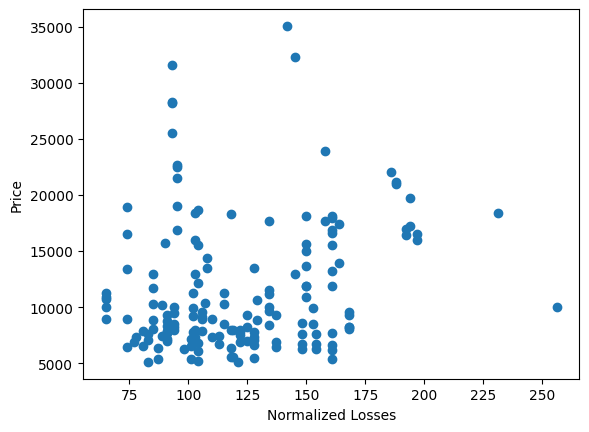

In [1049]:
plt.scatter(x = automobile_df_og['normalized_losses'], y = automobile_df_og['price'])
plt.xlabel('Normalized Losses')
plt.ylabel('Price')
plt.show()

Obsevation: 41 rows do not have normalized losses (20% of the rows).

Follow up: If I had no restriction on time I would try to predict the missing values taking in consideration the values from other columns. A simple approach could be to replace it with the columns mean but that could introduce error on Price prediction, that being said, I will drop this column, being aware that it could decrease the accuracy of the final model. Moreover, by looking at the scatter plot, it does not appear to have a correlation with the price.

In [993]:
automobile_df_wt_nans = automobile_df_og.drop(['normalized_losses'], axis=1)
print("Number of rows: ", len(automobile_df_wt_nans.index))
print("Number of rows with NaN values: ", automobile_df_wt_nans.isna().any(axis=1).sum())
print("Number of NaNs per column: \n", automobile_df_wt_nans.isna().sum())

Number of rows:  205
Number of rows with NaN values:  12
Number of NaNs per column: 
 symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64


Observation: Now 12 rows have missing values, taking into consideration that the dataset only has 205 rows, the missing values will be replaced by the mean of the column (excluding the price).

Follow up: Remove rows with price as NaN and use the mean/mode of the columns for the remaining.

In [994]:
from statistics import mode
automobile_df_wt_nans = automobile_df_wt_nans.dropna(subset=['price'])
automobile_df_wt_nans['num_doors'].fillna(mode(automobile_df_wt_nans['num_doors']), inplace=True) 
automobile_df_wt_nans['bore'].fillna(int(automobile_df_wt_nans['bore'].mean()), inplace=True) 
automobile_df_wt_nans['stroke'].fillna(int(automobile_df_wt_nans['stroke'].mean()), inplace=True) 
automobile_df_wt_nans['horsepower'].fillna(int(automobile_df_wt_nans['horsepower'].mean()), inplace=True) 
automobile_df_wt_nans['peak_rpm'].fillna(int(automobile_df_wt_nans['peak_rpm'].mean()), inplace=True) 
print("Number of rows: ", len(automobile_df_wt_nans.index))
print("Number of rows with NaN values: ", automobile_df_wt_nans.isna().any(axis=1).sum())
print("Number of NaNs per column: \n", automobile_df_wt_nans.isna().sum())

Number of rows:  201
Number of rows with NaN values:  0
Number of NaNs per column: 
 symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


<div class="markdown-google-sans">
  <h2>Data Distribution</h2>
</div>

In [995]:
automobile_df_wt_nans.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Observation: Categorical features will need encoding.

Follow up: Encode categorical features (next section).

<div class="markdown-google-sans">
  <h3>Categorical Variables</h3>
</div>

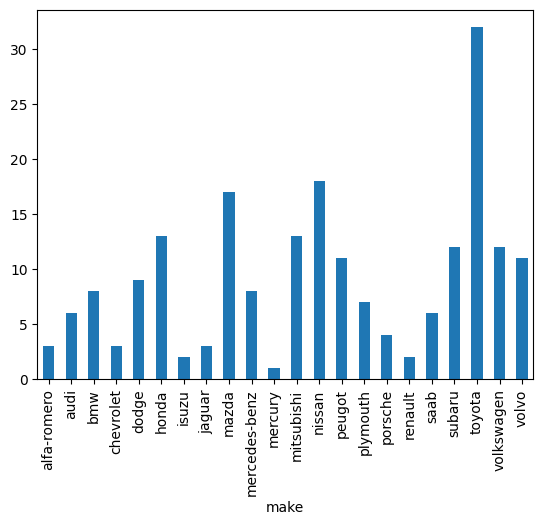

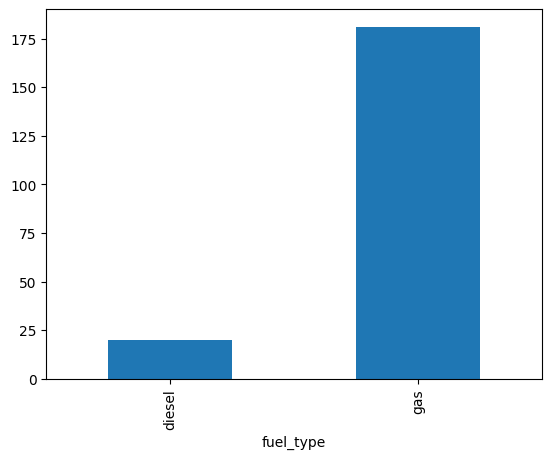

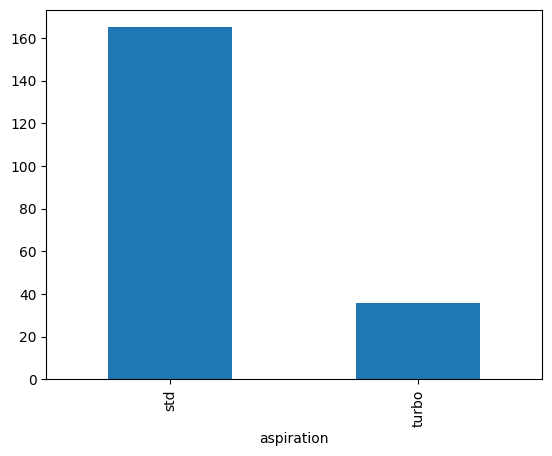

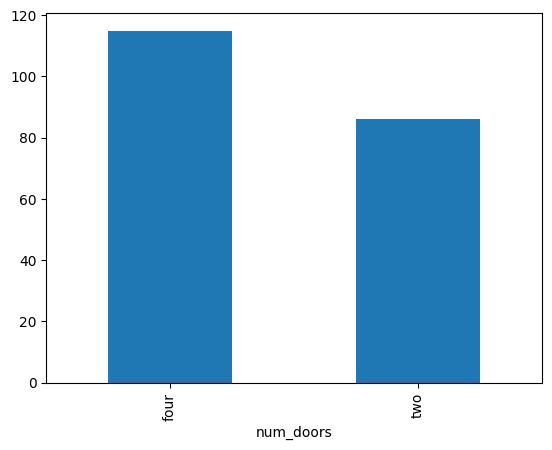

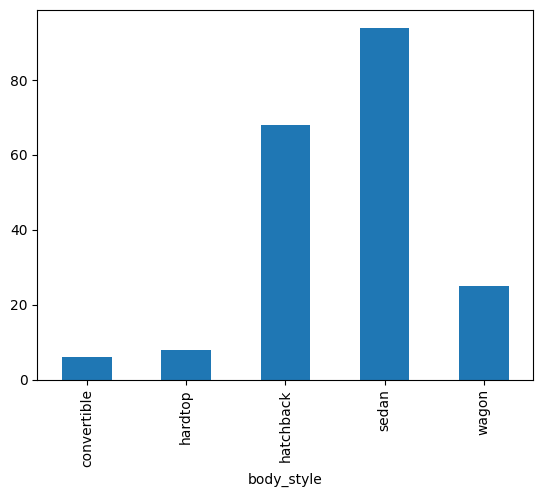

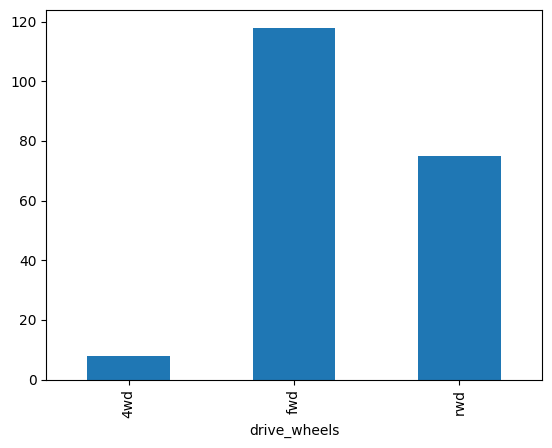

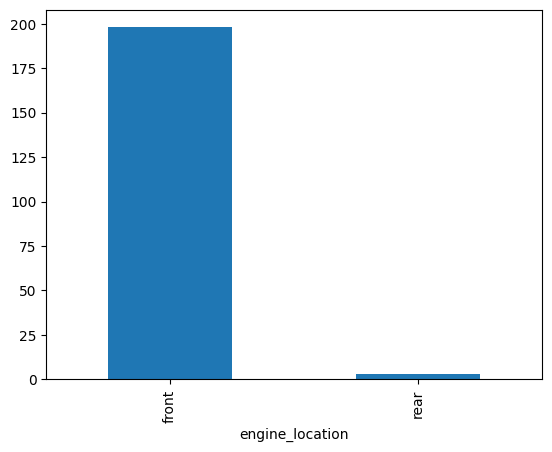

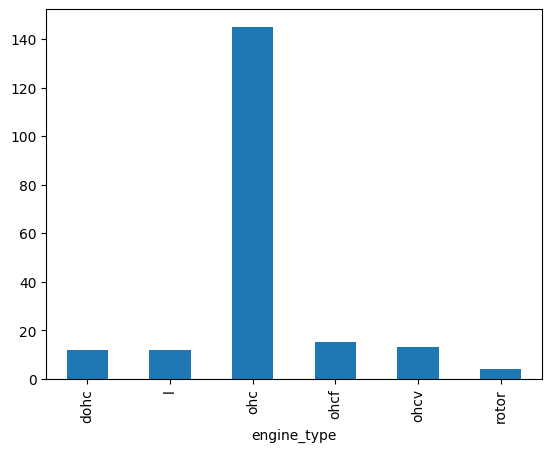

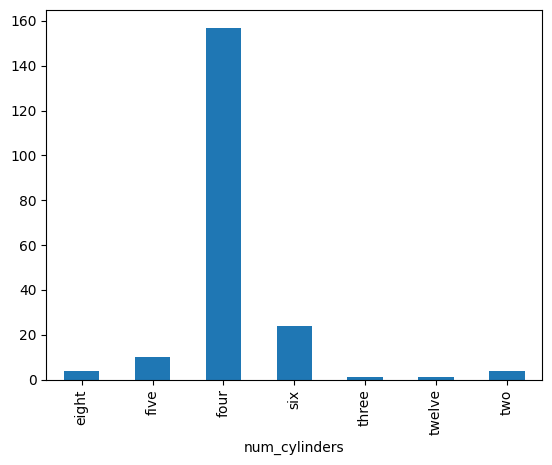

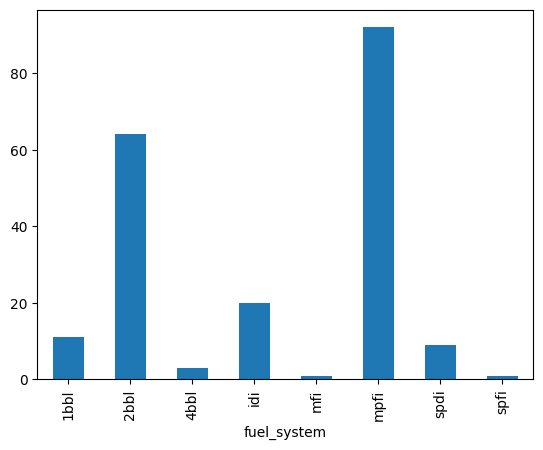

In [996]:
automobile_df_cat_vars_df = automobile_df_wt_nans.select_dtypes(include=['object']).copy()

for cat in automobile_df_cat_vars_df.columns:
    grouped_data = automobile_df_cat_vars_df.groupby(by = cat).size()
    grouped_data.plot.bar()
    plt.show()

The classes for the majority of the variables are not equally distributed, which may cause them to not be representative on predicting the price. Another observation that can be made is that two of the variables (number of doors and number of cylinders) are numbers represented as strings and that can be easily encoded.

<div class="markdown-google-sans">
  <h3>Numerical Variables</h3>
</div>

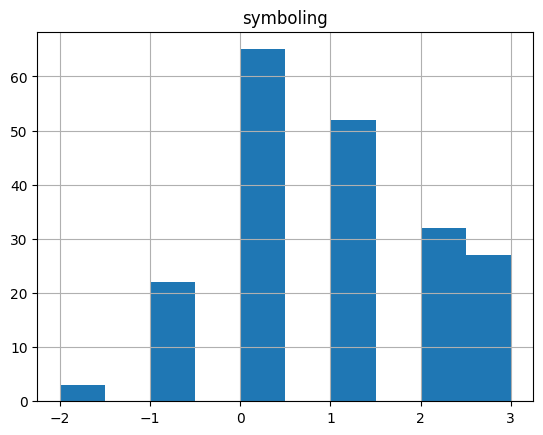

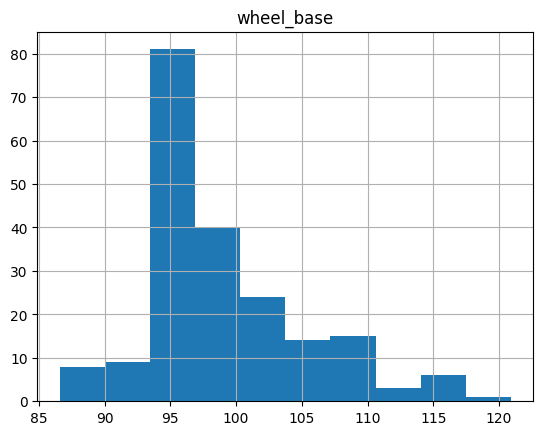

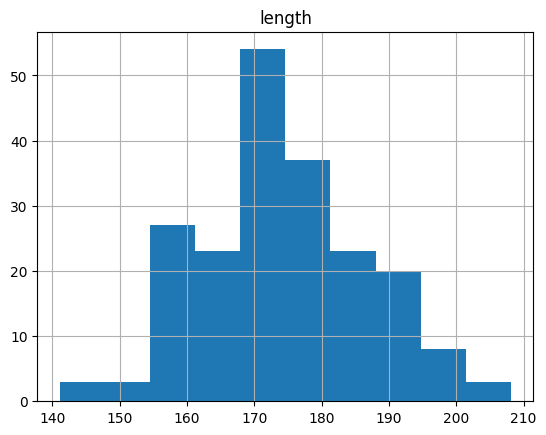

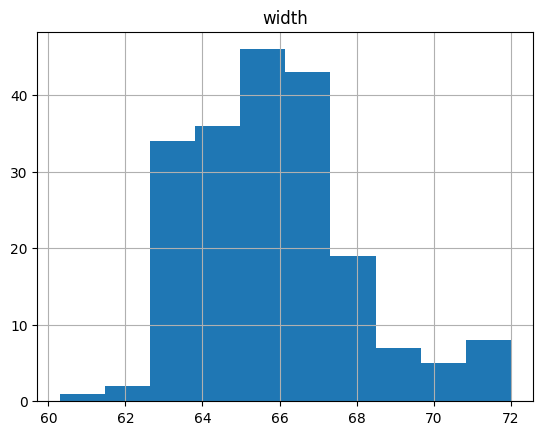

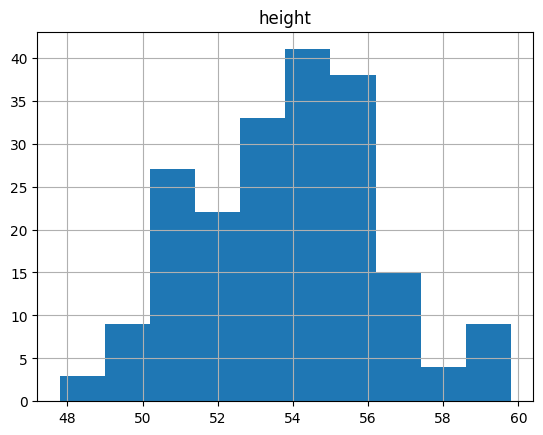

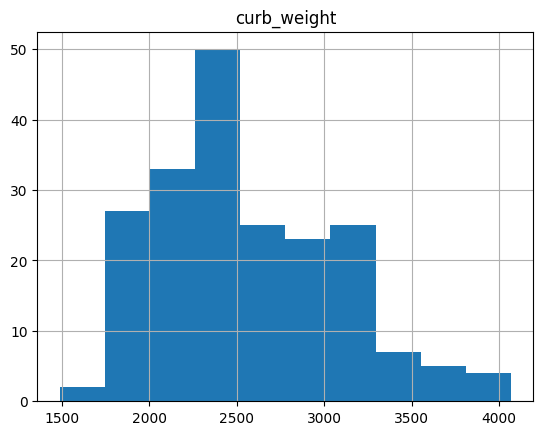

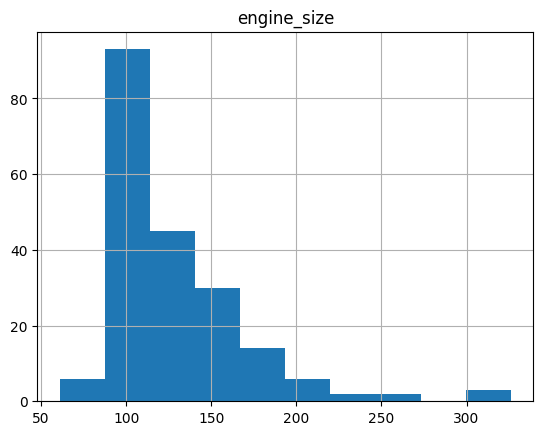

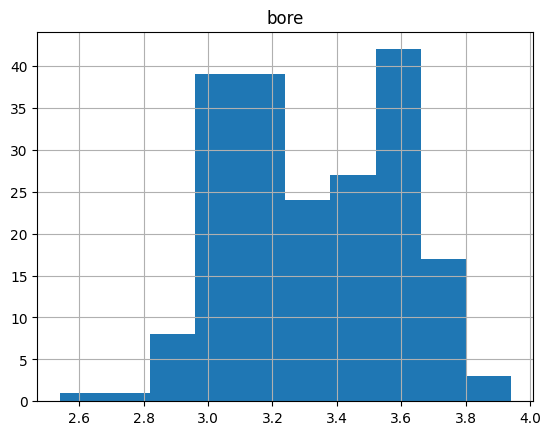

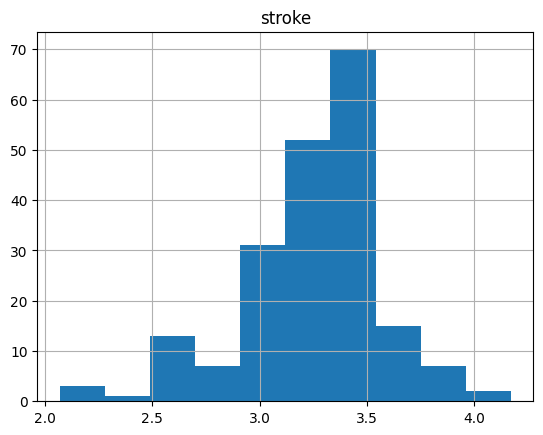

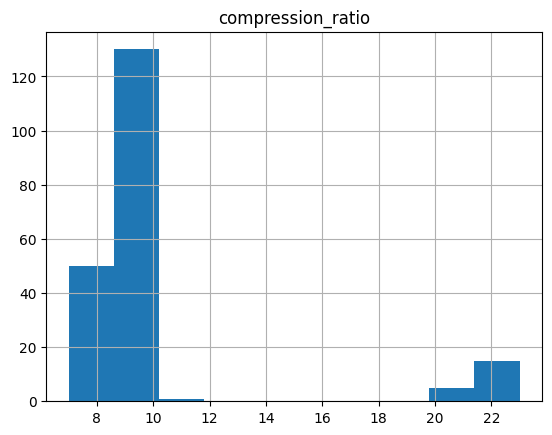

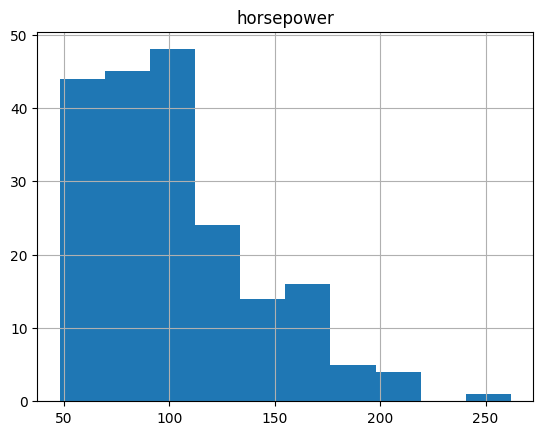

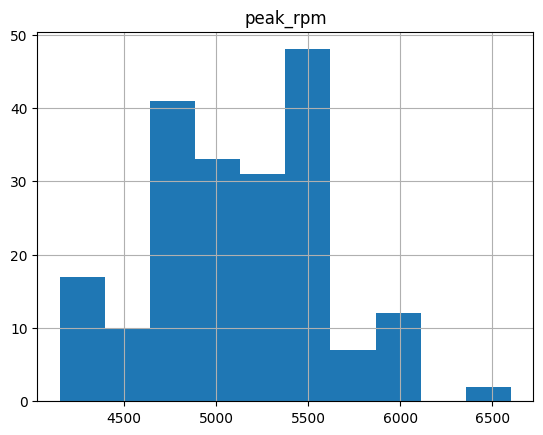

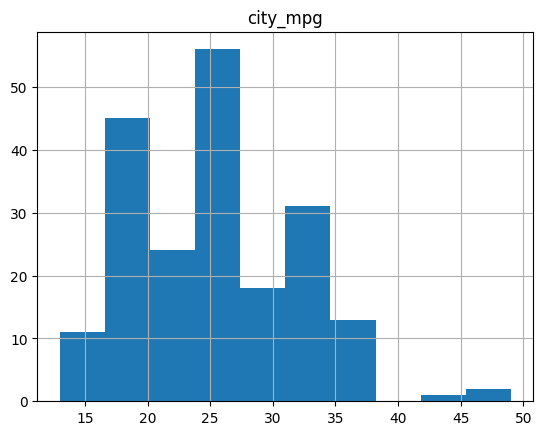

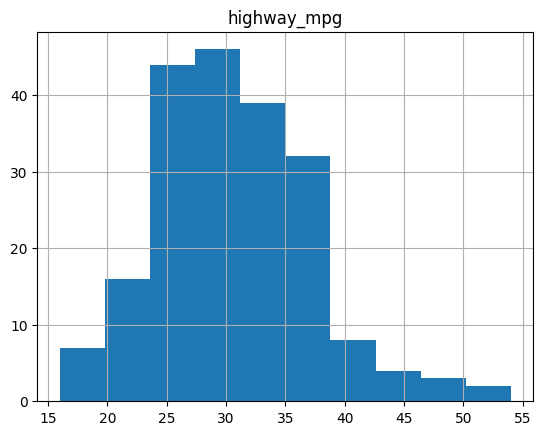

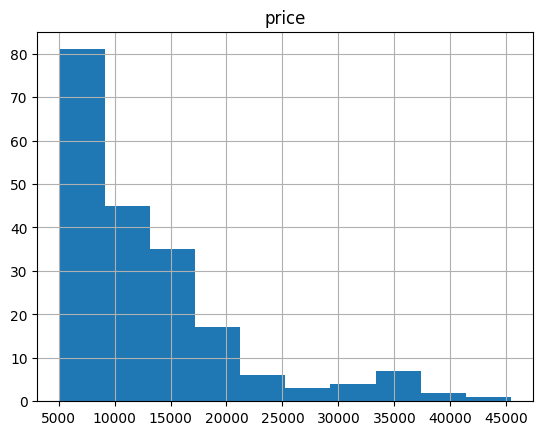

In [997]:
automobile_df_num_vars_df = automobile_df_wt_nans.select_dtypes(include=['int64', 'float64']).copy()

for var in automobile_df_num_vars_df.columns:
    automobile_df_num_vars_df.hist(column=var)
    plt.show()

The variables width, length and height seem to follow a normal distribution.

The price seems to follow a power law distribution with few expensive cars and an high quantity of less expensive cars.

<div class="markdown-google-sans">
  <h2>Categorical Variables Encoding</h2>
</div>

Observation: Number of doors and number of cylinders are represented by words, so those two features can be easly encoded.

Follow up: Encode number of doors and number of cylinders with their number representation.

In [998]:
replacements = {"num_doors":     {"two": 2, "four": 4},
                "num_cylinders": {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}}
automobile_df_cat_var_enc = automobile_df_wt_nans.replace(replacements)
automobile_df_cat_var_enc.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders          int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Observation: The remaining categorical variables cannot be as easily mapped into a numerical feature. For example, if we replaced 'fuel_system' by numbers like  {"1bbl": 1, "2bbl": 2, "4bbl": 3, "idi": 4, "mfi": 5, "mpfi": 6, "spdi": 7, "spfi": 8} we could be wrongly be teaching the model that there is some rank for that variable. 

Moreover, some features have only two possible values, so a simple approach could be to replace it with binary values, however, that could not be scalable if more possibles values would to be added. Therefore, the remaining variables will be encoded using one-hot encoding. Even thought some of the features have a considerable number of classes, resulting in the addition of multiple features, on a latter stage (feature engineering), some of them will be combined.

Follow up: Use one hot encoding on remaining categorical variables.

In [999]:
categorical_columns = ["make", "fuel_type", "aspiration", "body_style", "drive_wheels", "engine_location", "engine_type", "fuel_system"]
automobile_df_cat_var_enc = pd.get_dummies(automobile_df_cat_var_enc.copy(), columns = categorical_columns)
automobile_df_cat_var_enc.dtypes

symboling             int64
num_doors             int64
wheel_base          float64
length              float64
width               float64
                     ...   
fuel_system_idi        bool
fuel_system_mfi        bool
fuel_system_mpfi       bool
fuel_system_spdi       bool
fuel_system_spfi       bool
Length: 67, dtype: object

<div class="markdown-google-sans">
  <h2>Outlier Removal</h2>
</div>

Starting by drawing the box plots to see in which variables we can observe points outside of the inter quartile region. 

Secondly drawing the scatter plot for each pair of independent/dependent variable, allowing us to also detect outliers while already detecting relationships between variables.

Excluding the hot encoded variables since there are only two possible values.

Analysing variable:  symboling


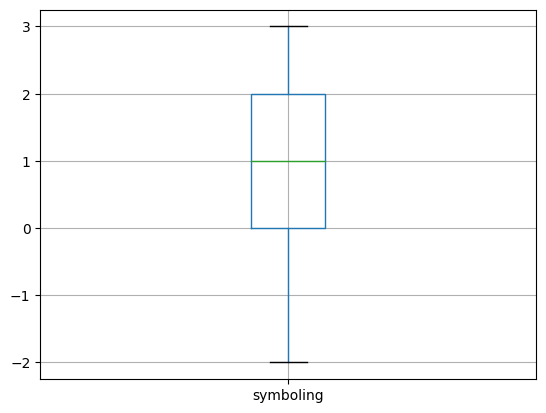

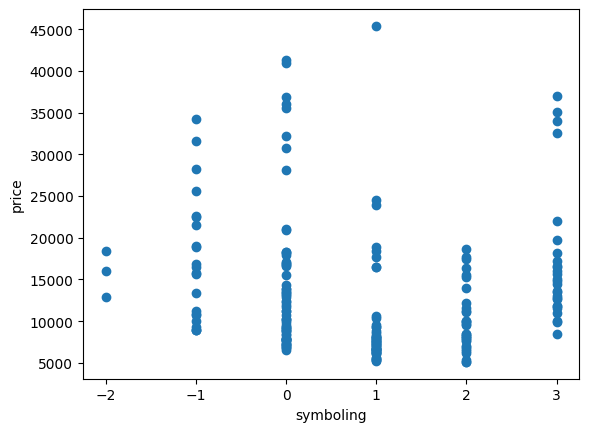

---------------------------------------------------------------------------------------- 

Analysing variable:  num_doors


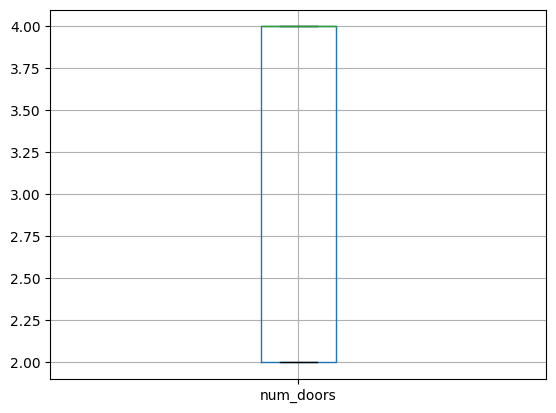

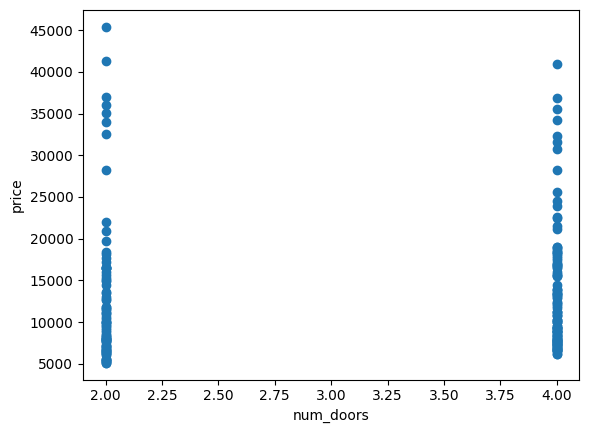

---------------------------------------------------------------------------------------- 

Analysing variable:  wheel_base


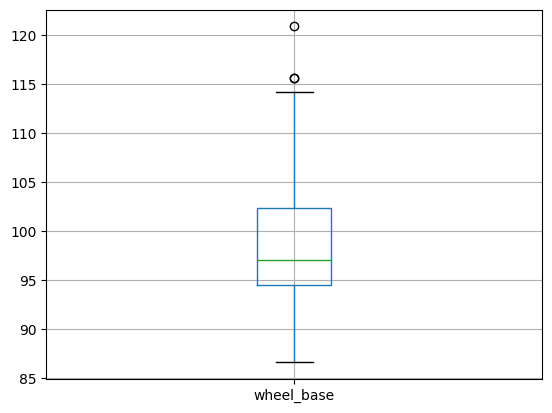

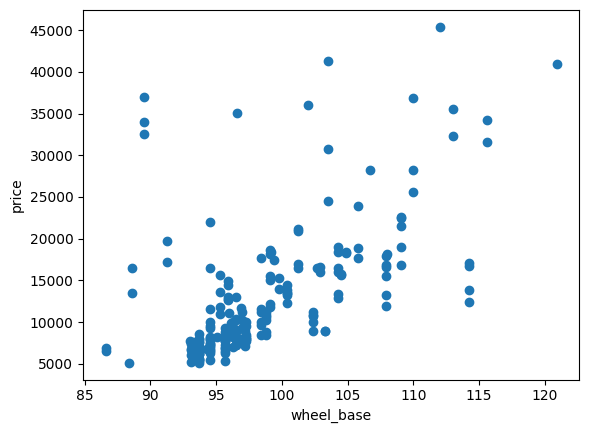

---------------------------------------------------------------------------------------- 

Analysing variable:  length


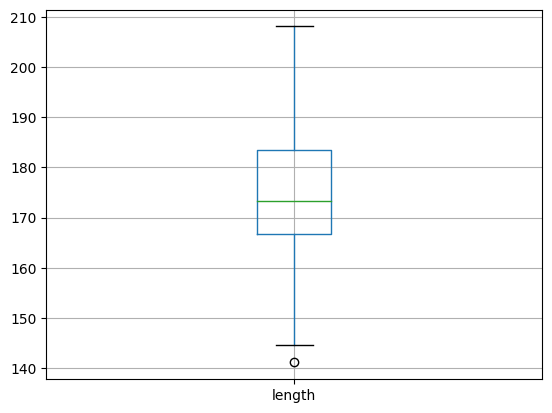

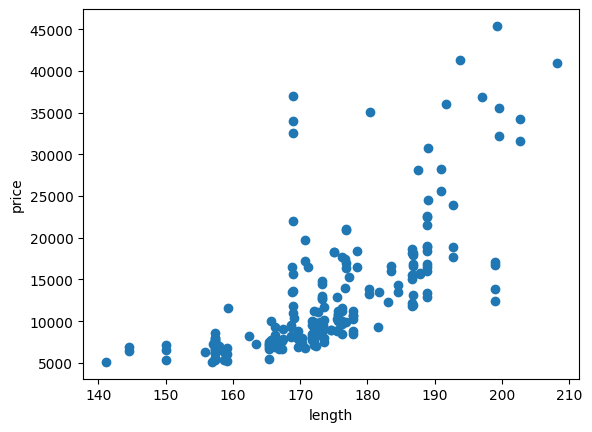

---------------------------------------------------------------------------------------- 

Analysing variable:  width


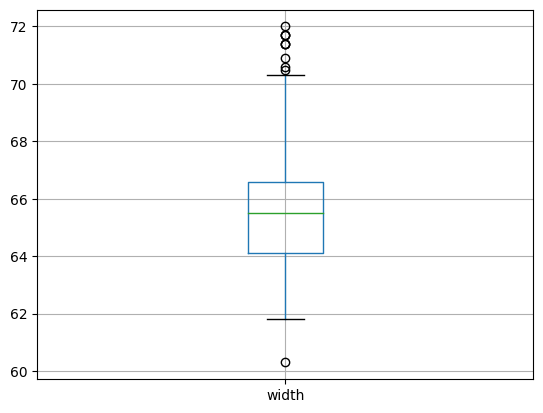

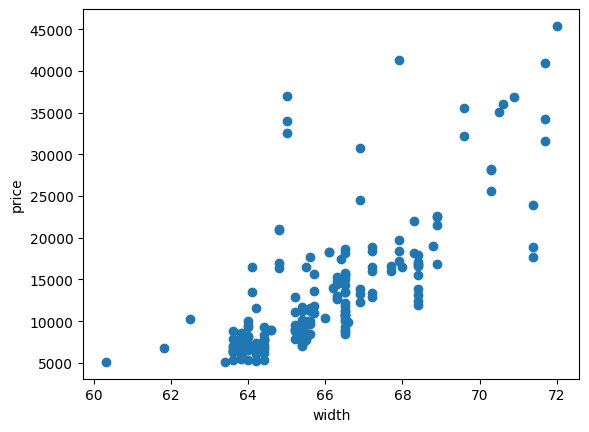

---------------------------------------------------------------------------------------- 

Analysing variable:  height


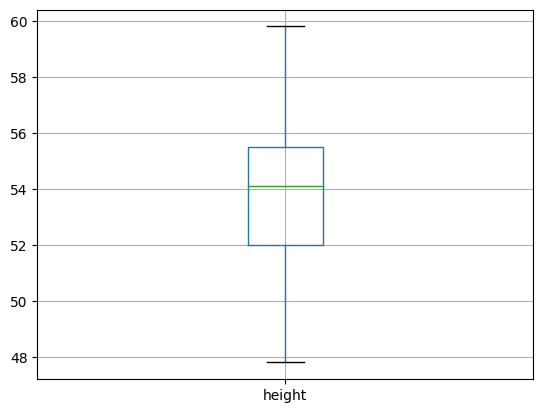

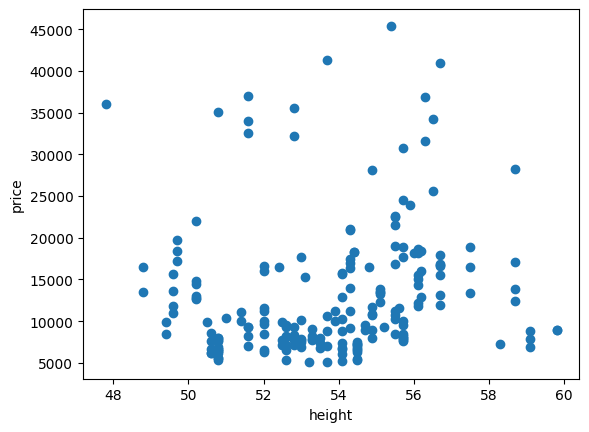

---------------------------------------------------------------------------------------- 

Analysing variable:  curb_weight


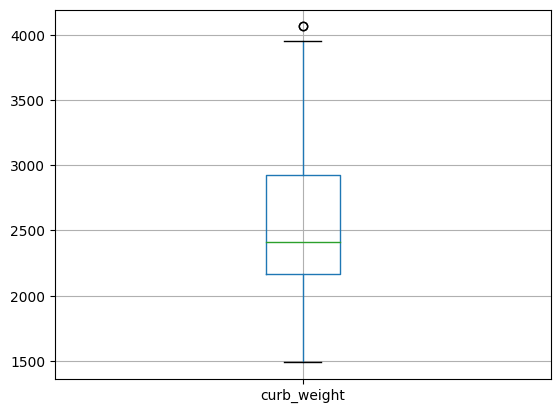

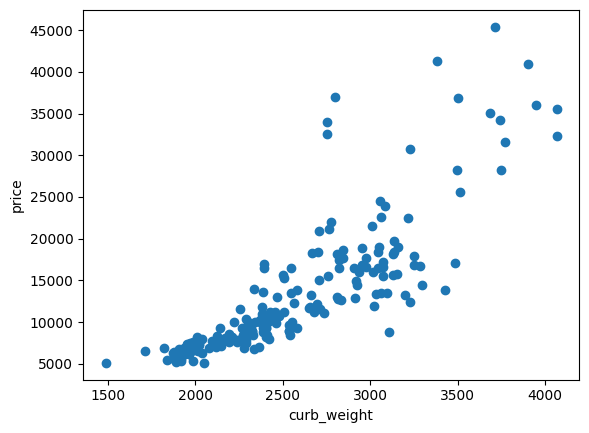

---------------------------------------------------------------------------------------- 

Analysing variable:  num_cylinders


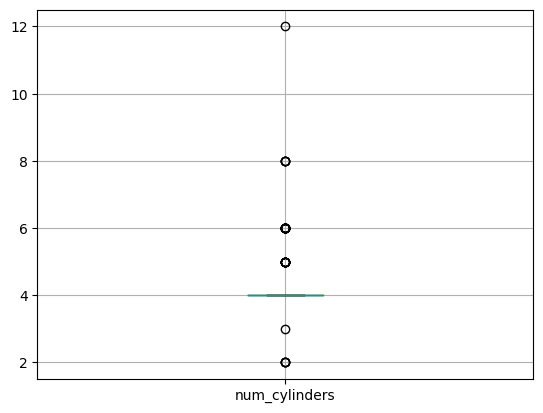

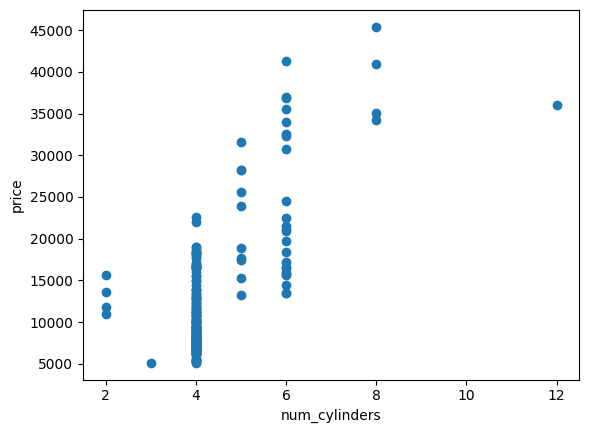

---------------------------------------------------------------------------------------- 

Analysing variable:  engine_size


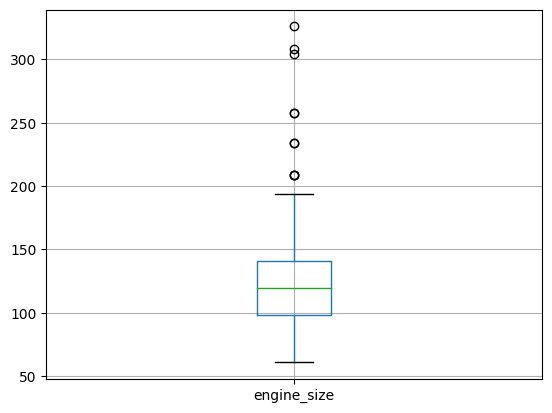

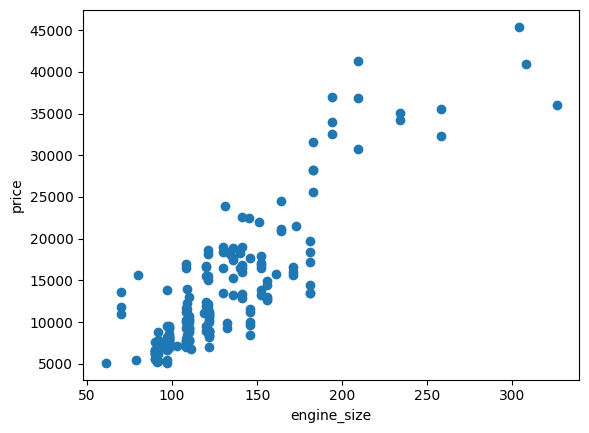

---------------------------------------------------------------------------------------- 

Analysing variable:  bore


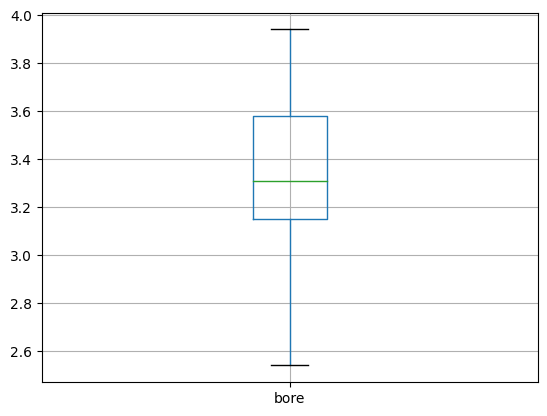

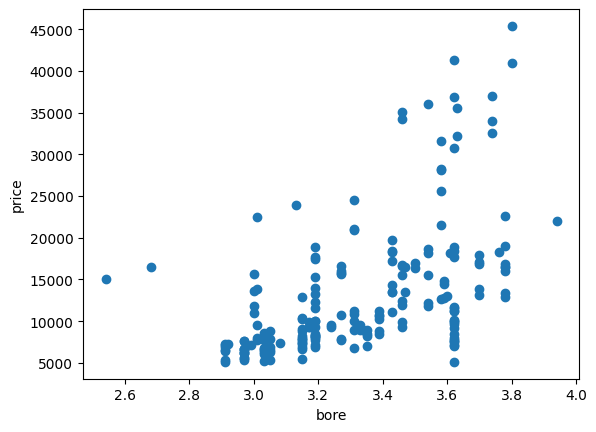

---------------------------------------------------------------------------------------- 

Analysing variable:  stroke


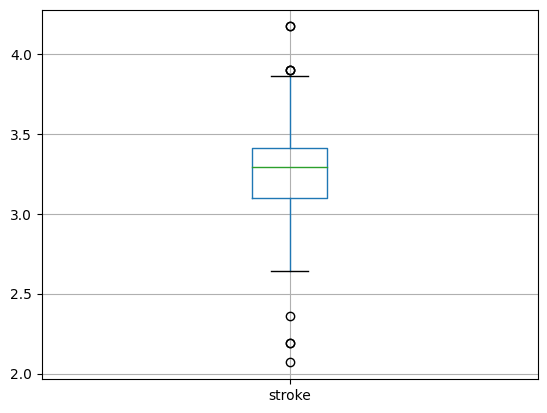

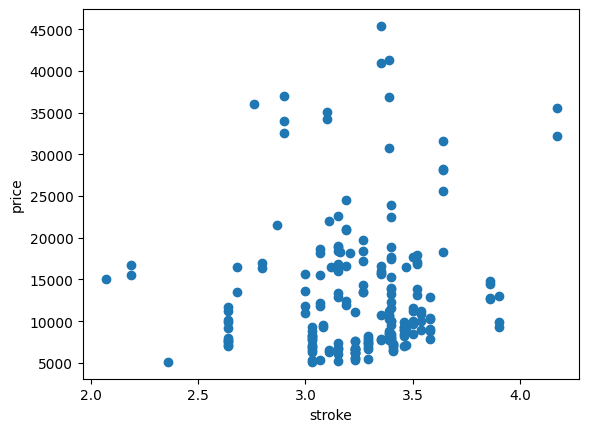

---------------------------------------------------------------------------------------- 

Analysing variable:  compression_ratio


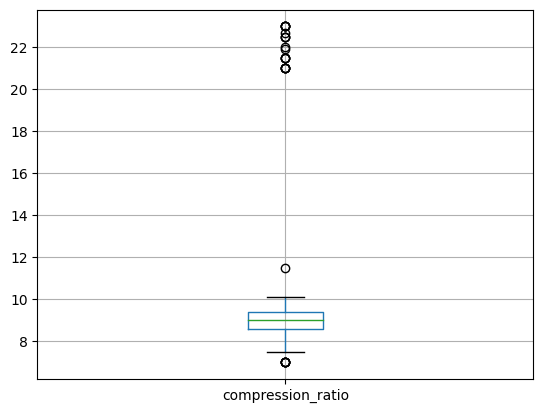

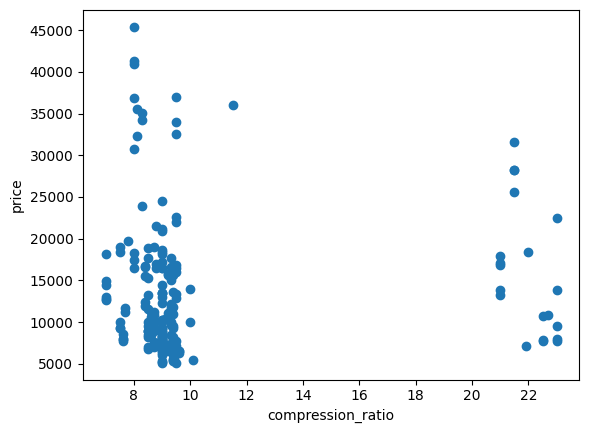

---------------------------------------------------------------------------------------- 

Analysing variable:  horsepower


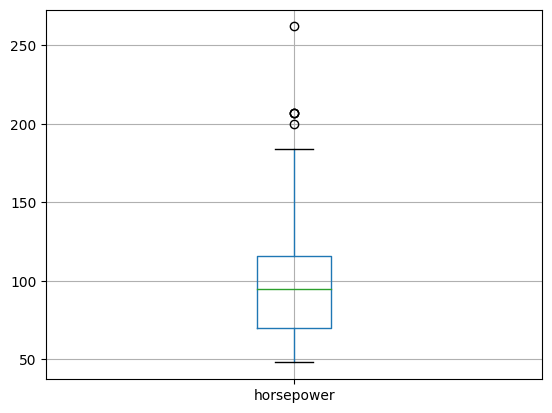

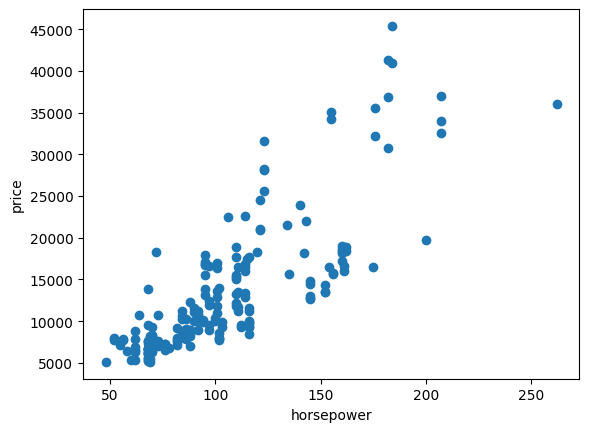

---------------------------------------------------------------------------------------- 

Analysing variable:  peak_rpm


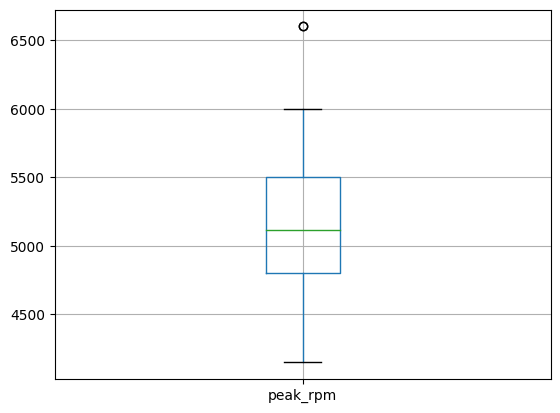

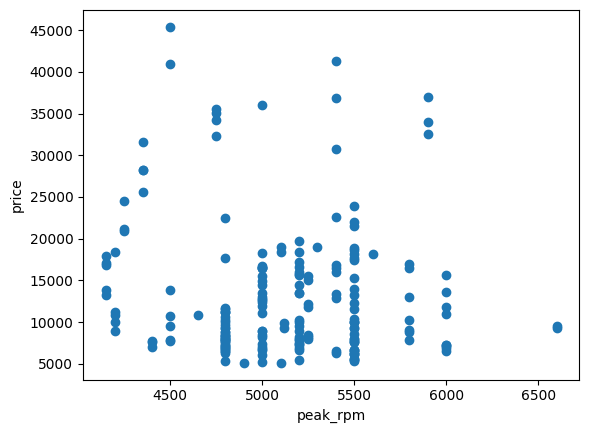

---------------------------------------------------------------------------------------- 

Analysing variable:  city_mpg


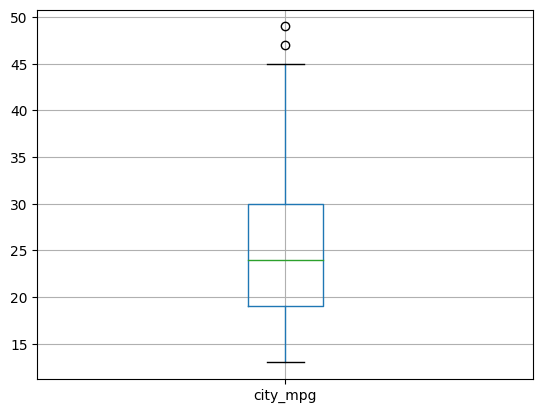

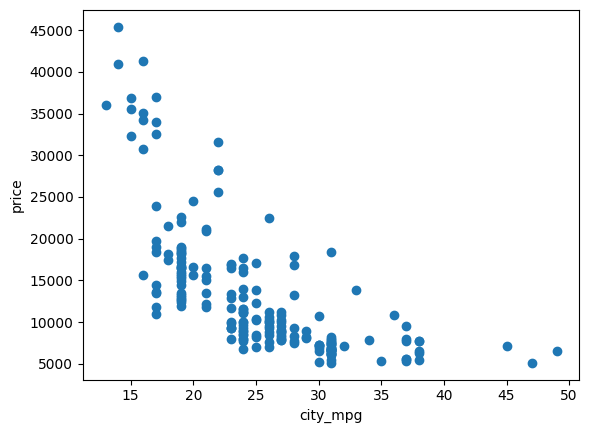

---------------------------------------------------------------------------------------- 

Analysing variable:  highway_mpg


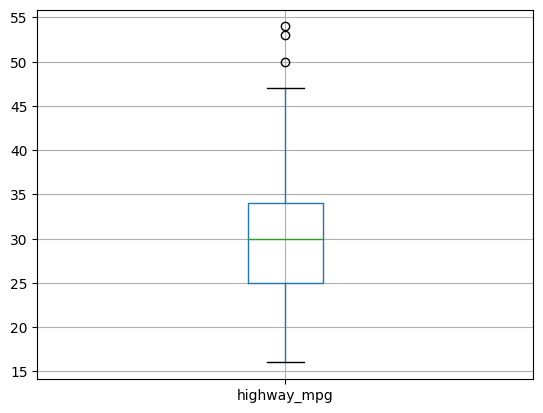

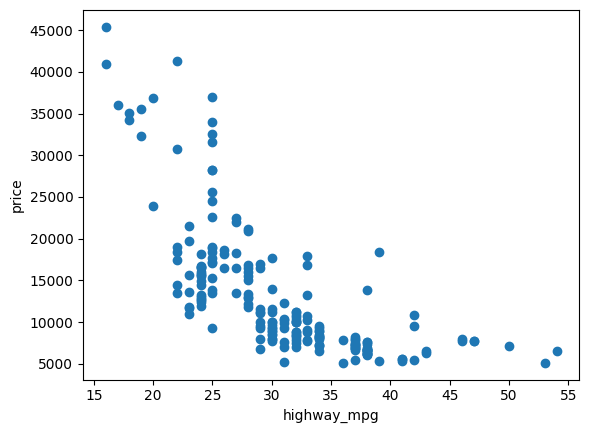

---------------------------------------------------------------------------------------- 

Analysing variable:  price


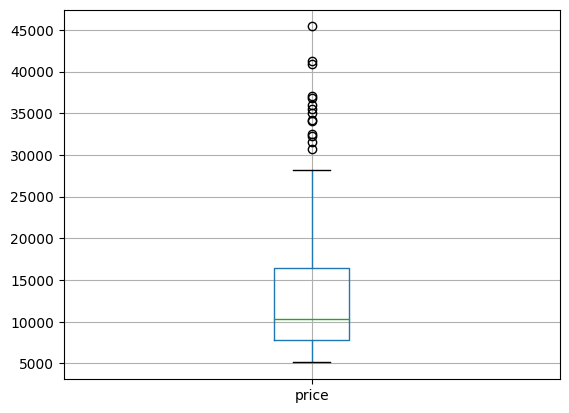

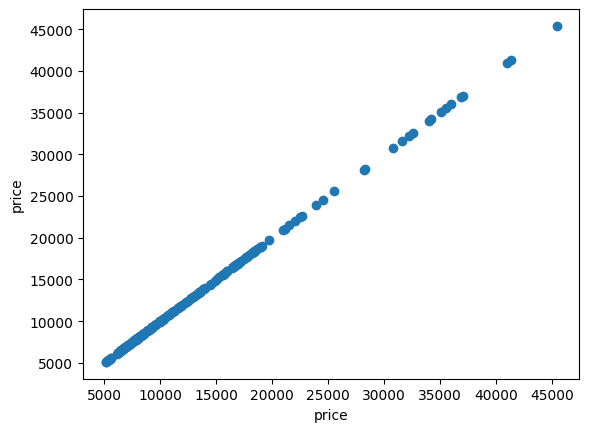

---------------------------------------------------------------------------------------- 



In [1000]:
automobile_df_cat_wt_bool = automobile_df_cat_var_enc.select_dtypes(include=['int64', 'float64']).copy()

for var in automobile_df_cat_wt_bool.columns:
    print("Analysing variable: ", var)
    automobile_df_cat_wt_bool.boxplot(column=var)
    plt.show()
    plt.scatter(x = automobile_df_cat_wt_bool[var], y = automobile_df_cat_wt_bool['price'])
    plt.xlabel(var)
    plt.ylabel("price")
    plt.show()
    print("---------------------------------------------------------------------------------------- \n")

Analysing each variable, the following conclusions can be taken:

- symboling: No outliers. No visible relationship.

- num_doors: No outliers. No visible relationship.

- wheel_base: Even though the box plots shows some points above 115 the scatter plot seems to indicate a somehow positive relationship so those points can’t be confidently considered outliers.

- length: No points can’t be confidently considered outliers. Positive relationship.

- width: No points can’t be confidently considered outliers. Positive relationship.

- height: No points can’t be confidently considered outliers. No visible relationship.

- curb_weight: No points can’t be confidently considered outliers. Positive relationship.

- num_cylinders: Only one car with 12 cylinders, which is not representative and seem to break the somewhat positive relationship. **Remove outlier.**

- engine_size: Even though the box plots shows some points above 200 the scatter plot seems to indicate a somewhat positive relationship so those points can’t be confidently considered outliers.

- bore: No points can’t be confidently considered outliers. Slight positive relationship.

- stroke: No points can’t be confidently considered outliers. No visible relationship.

- compression_ratio: No points can’t be confidently considered outliers. No visible relationship.

- horsepower: Even though the box plots shows some points above ~180 the scatter plot seems to indicate a somehow positive relationship so those points can’t be confidently considered outliers.

- peak_rpm: No points can’t be confidently considered outliers. No visible relationship.

- city_mpg: Even though the box plots shows some points above 45 the scatter plot seems to indicate a somehow negative relationship so those points can’t be confidently considered outliers.

- highway_mpg: Even though the box plots shows some points above 45 the scatter plot seems to indicate a somehow negative relationship so those points can’t be confidently considered outliers.

Analysing variable:  make


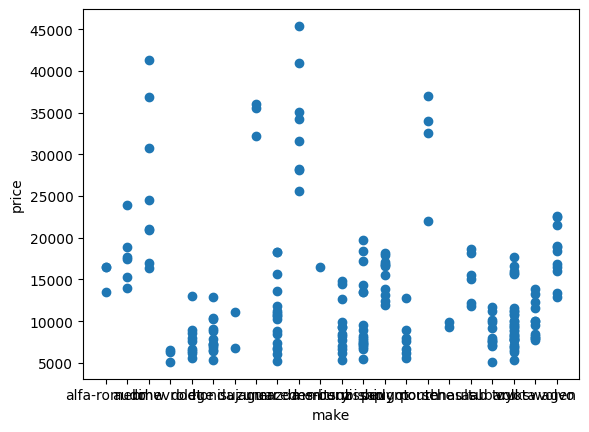

---------------------------------------------------------------------------------------- 

Analysing variable:  fuel_type


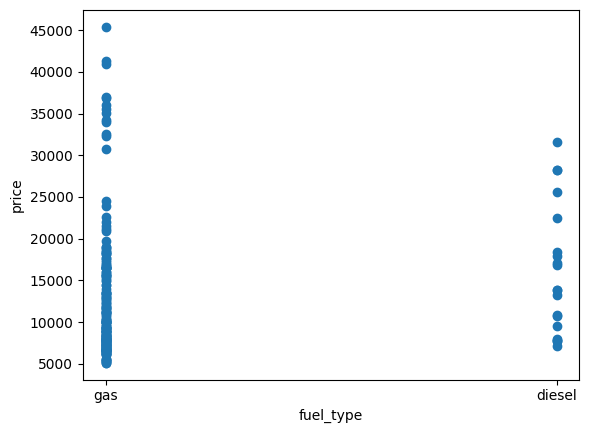

---------------------------------------------------------------------------------------- 

Analysing variable:  aspiration


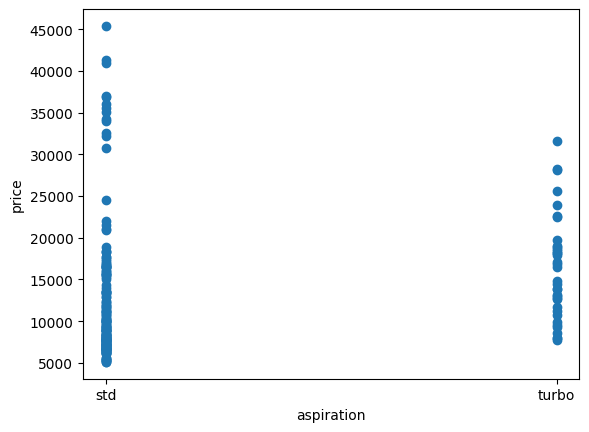

---------------------------------------------------------------------------------------- 

Analysing variable:  body_style


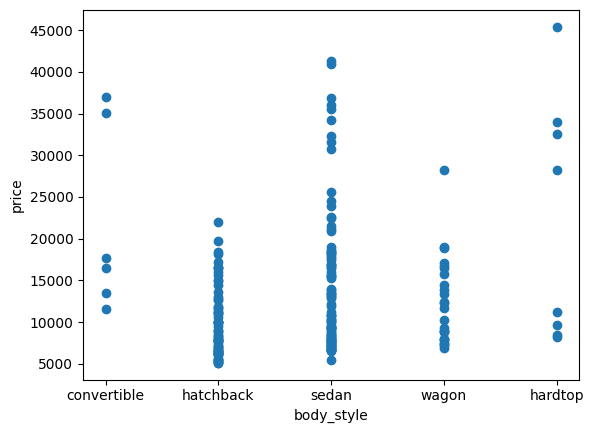

---------------------------------------------------------------------------------------- 

Analysing variable:  drive_wheels


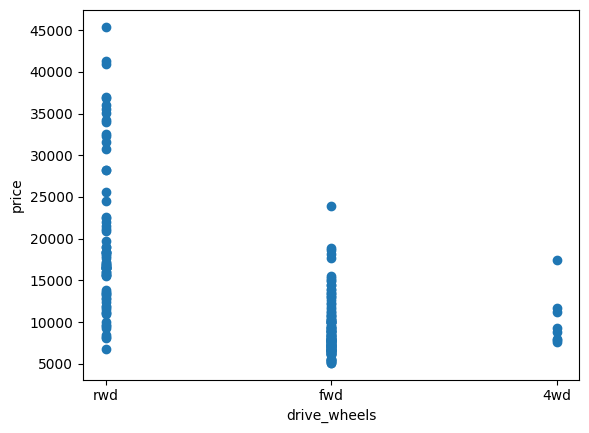

---------------------------------------------------------------------------------------- 

Analysing variable:  engine_location


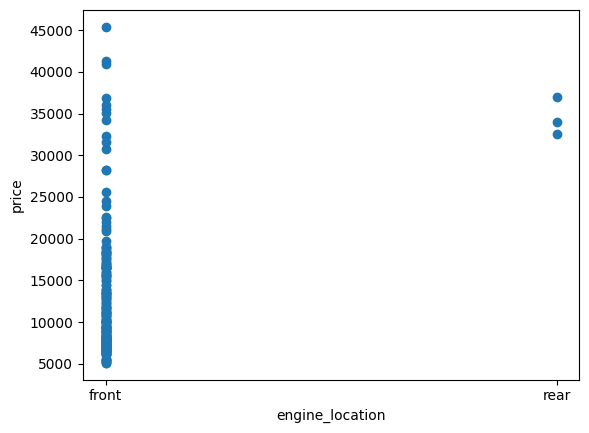

---------------------------------------------------------------------------------------- 

Analysing variable:  engine_type


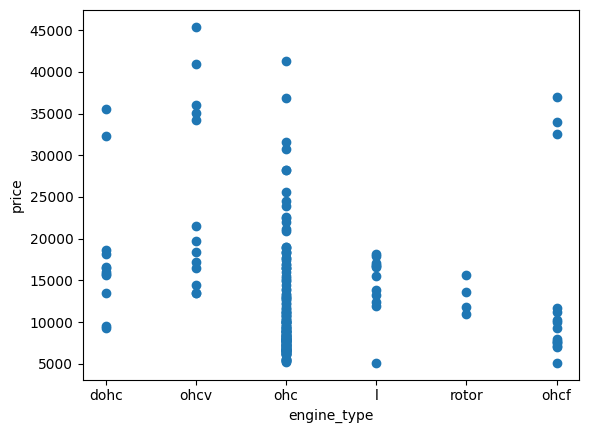

---------------------------------------------------------------------------------------- 

Analysing variable:  fuel_system


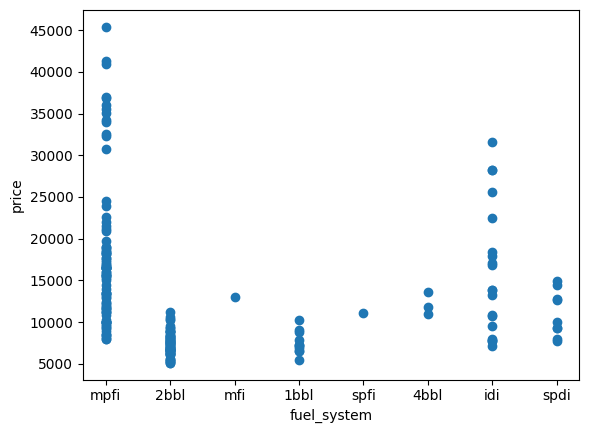

---------------------------------------------------------------------------------------- 



In [1001]:
automobile_df_cat = automobile_df_og.select_dtypes(include=['object']).copy().drop(columns=['num_doors', 'num_cylinders'])

for var in automobile_df_cat.columns:
    print("Analysing variable: ", var)
    plt.scatter(x = automobile_df_cat[var], y = automobile_df_og['price'])
    plt.xlabel(var)
    plt.ylabel("price")
    plt.show()
    print("---------------------------------------------------------------------------------------- \n")

No conclusions can be taken regarding outlier removal for the categorical variables.

In [1002]:
print("Number of rows before outlier removal: ", len(automobile_df_cat_var_enc.index))

automobile_df_wt_outliers = automobile_df_cat_var_enc.copy()
outliers = []
car_with_12_cylinders = np.where(automobile_df_wt_outliers['num_cylinders']>=12)[0]
outliers.extend(car_with_12_cylinders) 

print(outliers)
automobile_df_wt_outliers.drop(index=outliers, inplace=True)

print("Number of rows after outlier removal: ", len(automobile_df_wt_outliers.index))

Number of rows before outlier removal:  201
[46]
Number of rows after outlier removal:  200


<div class="markdown-google-sans">
  <h2>Correlations</h2>
</div>

<div class="markdown-google-sans">
  <h3>Numerical Variables</h3>
</div>

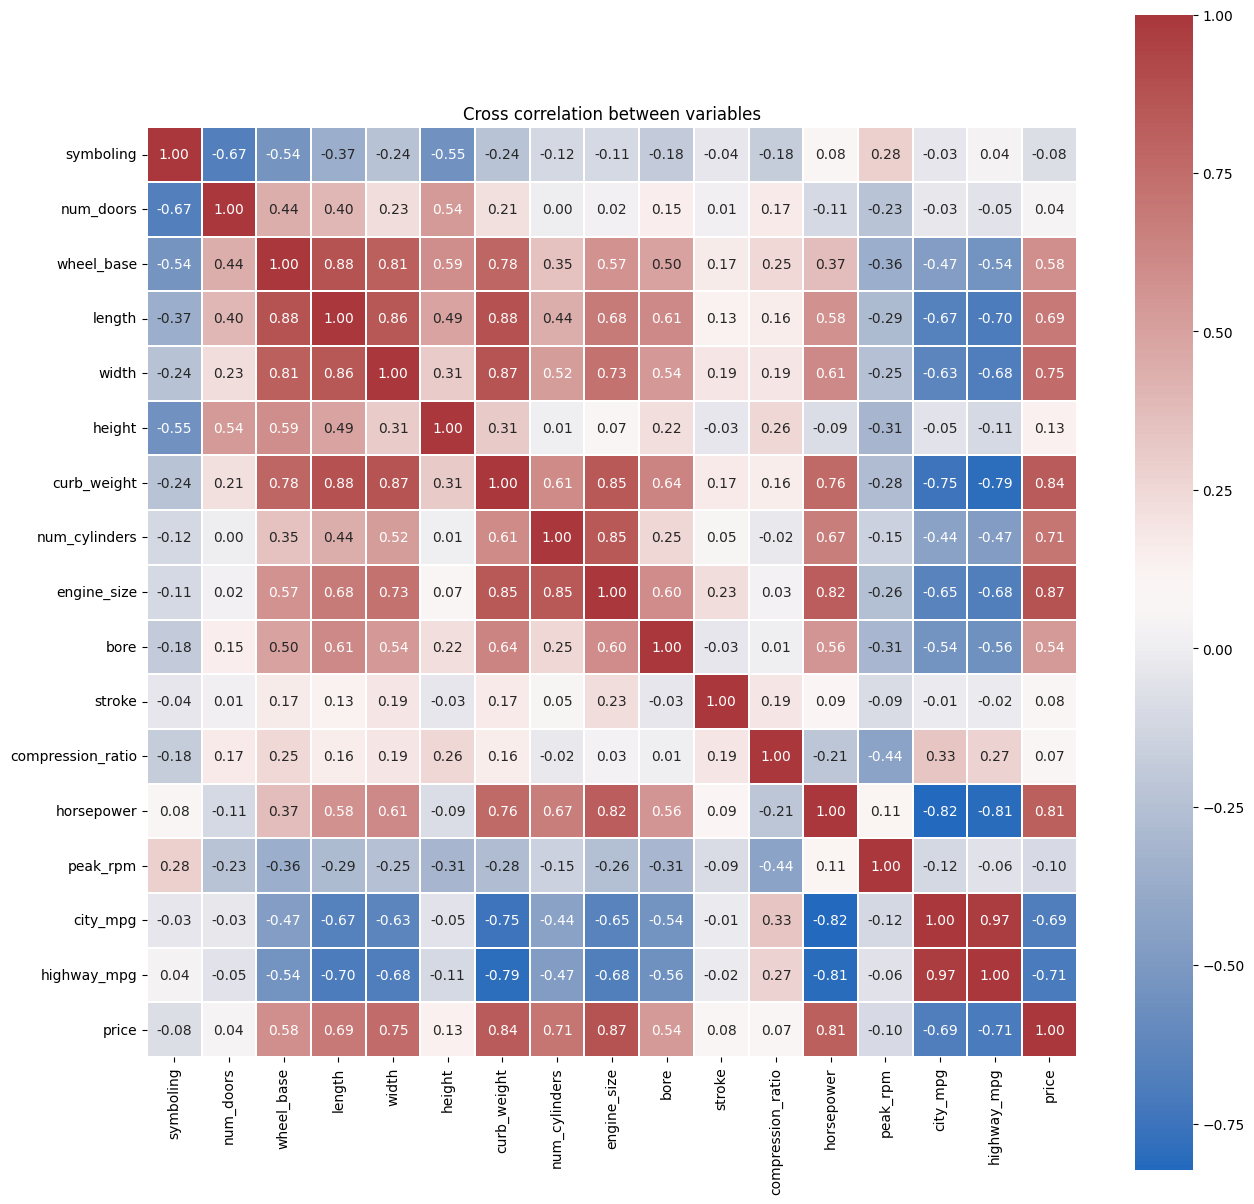

In [1003]:
plt.figure(figsize=(15, 15))
automobile_df_wt_outliers_wt_bool = automobile_df_wt_outliers.copy().select_dtypes(include=['int64', 'float64'])
ax = sns.heatmap(automobile_df_wt_outliers_wt_bool.corr(), square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Cross correlation between variables')
plt.show()

The majority of the features seem to be related to the price. Some of the features that can be excluded from the feature selection (next section) are the 'symboling', 'num_doors', 'stroke', 'compression_ratio', and 'peak_rpm'. Another conclusion that can be taken is that most of the independent variables seem to be correlated among each other which can cause multicollinearity (a small change in one variable can lead to a significant amount of swing in the model output) so that might be sign that some type of feature engineering is needed. For example, combining 'horsepower' and 'engine size' creating a new variable ('engine_power') or 'city_mpg' and 'highway_mpg' into 'mpg'. Principal Component Analysis (PCA) can also be one way to address the problem.

<div class="markdown-google-sans">
  <h3>Categorical Variables</h3>
</div>

Analysing variables:  make  and  make


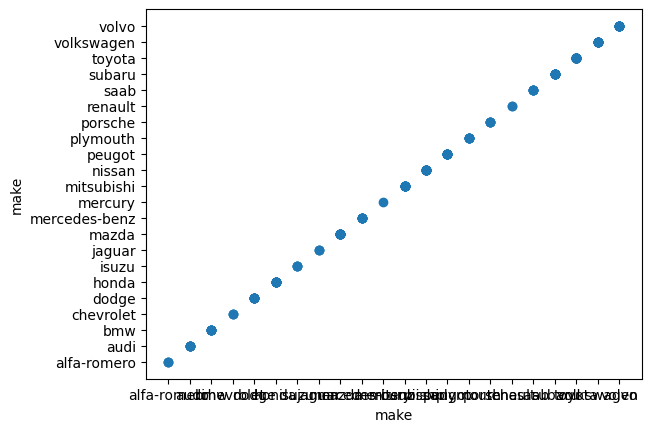

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  fuel_type


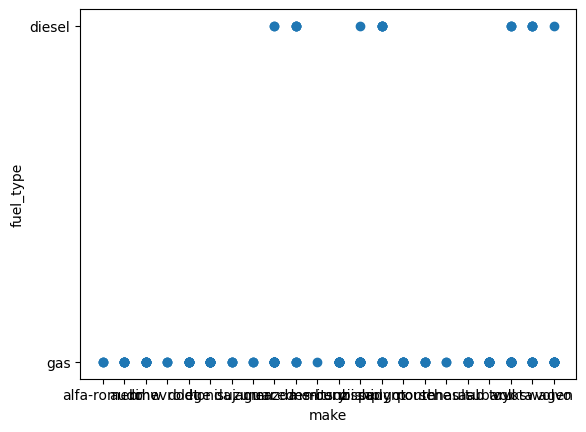

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  aspiration


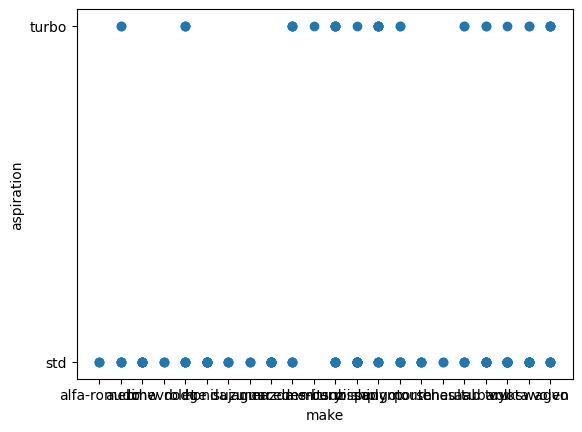

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  body_style


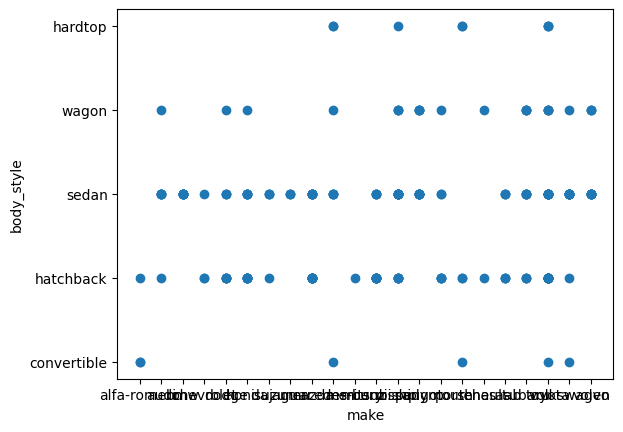

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  drive_wheels


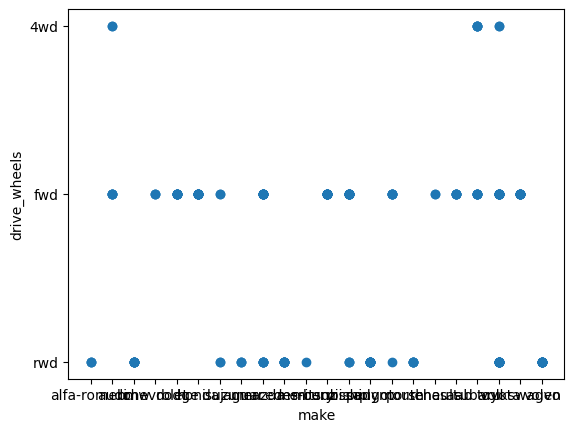

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  engine_location


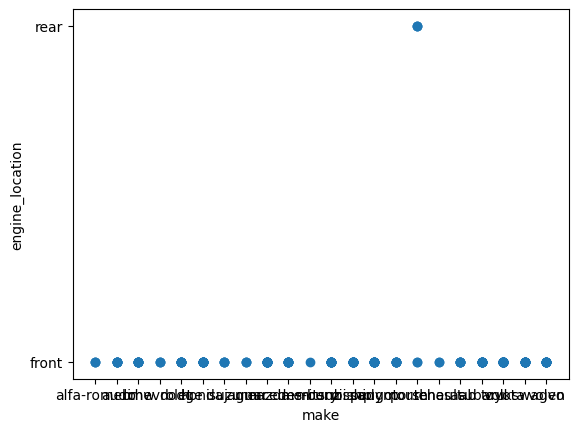

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  engine_type


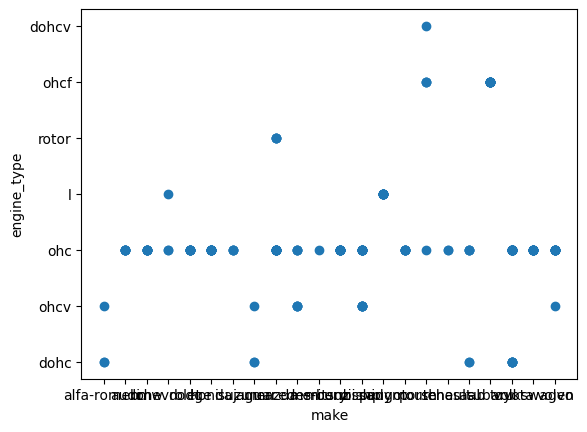

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  fuel_system


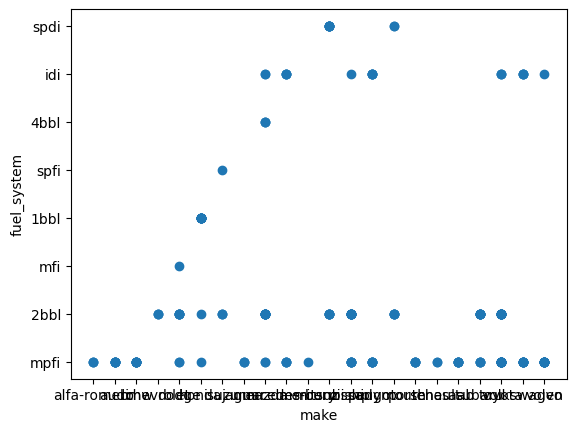

---------------------------------------------------------------------------------------- 

Analysing variables:  make  and  price


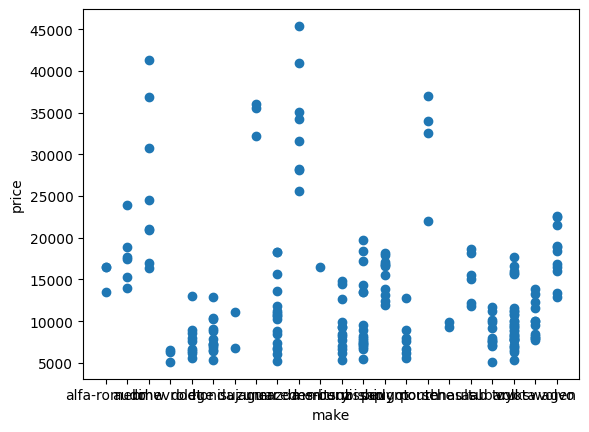

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  make


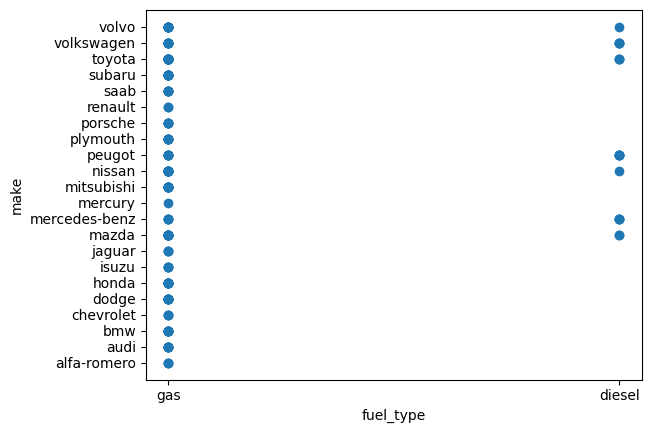

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  fuel_type


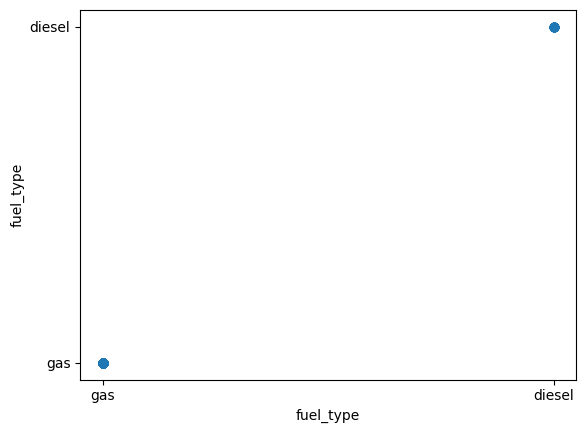

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  aspiration


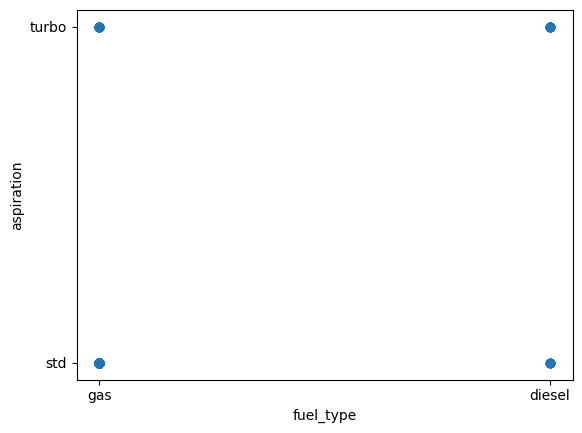

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  body_style


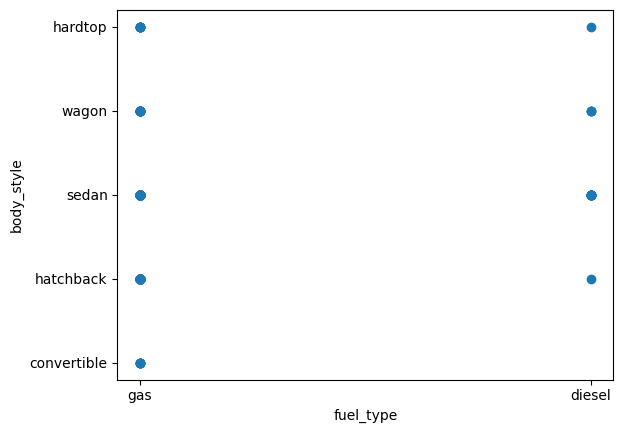

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  drive_wheels


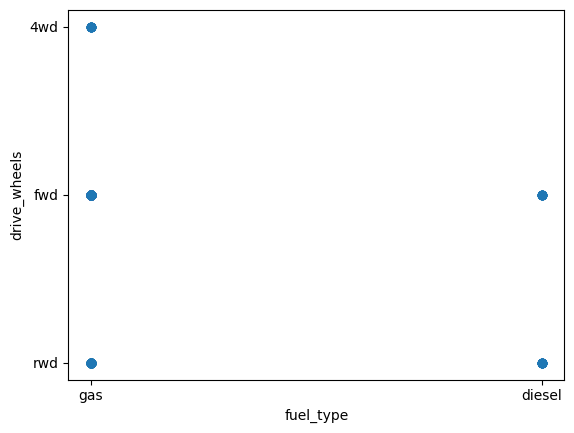

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  engine_location


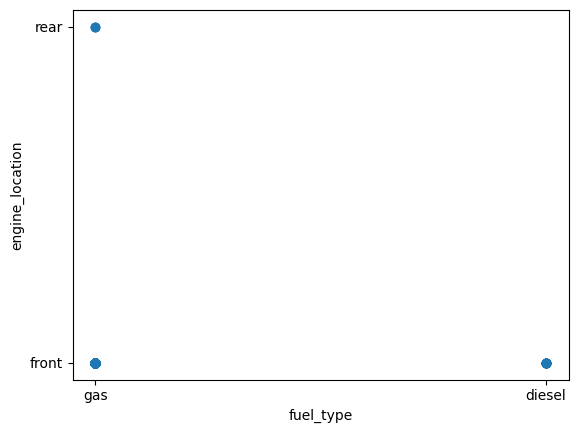

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  engine_type


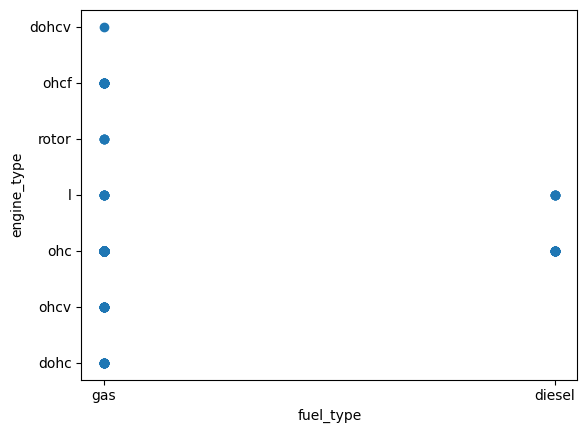

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  fuel_system


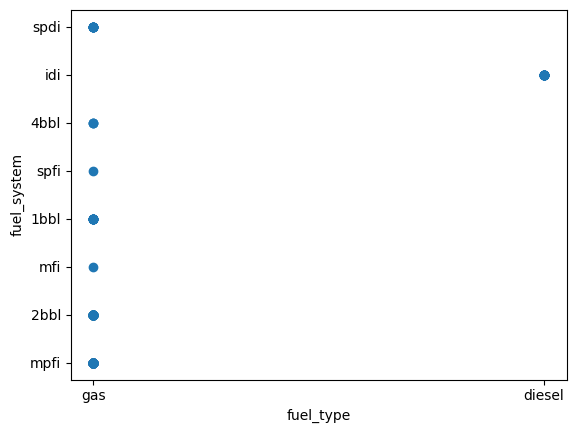

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_type  and  price


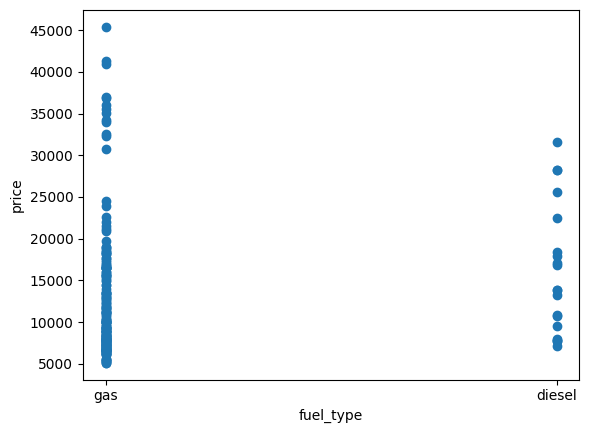

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  make


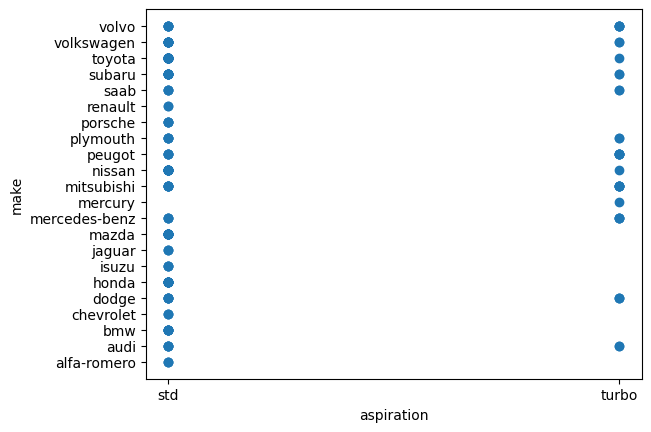

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  fuel_type


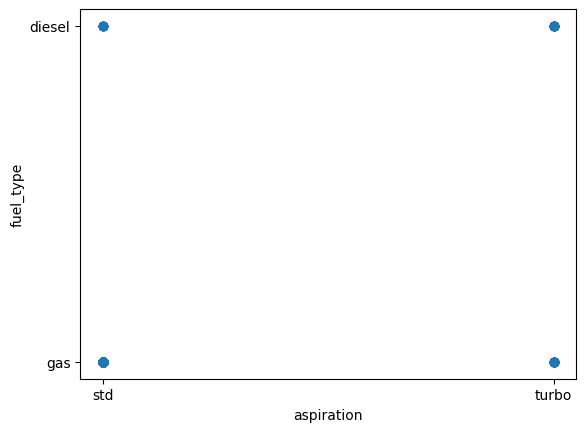

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  aspiration


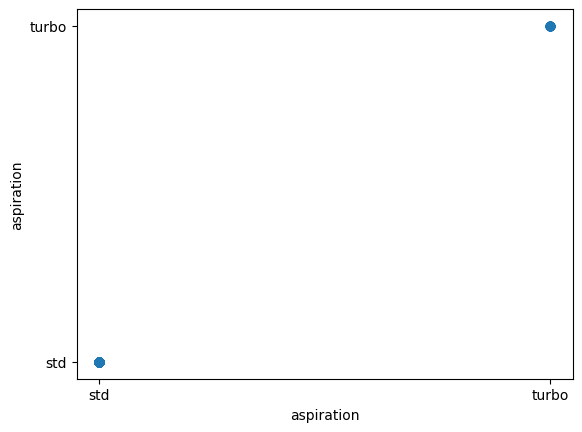

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  body_style


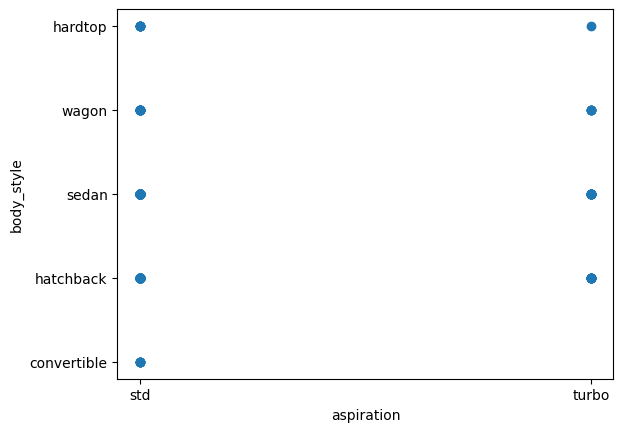

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  drive_wheels


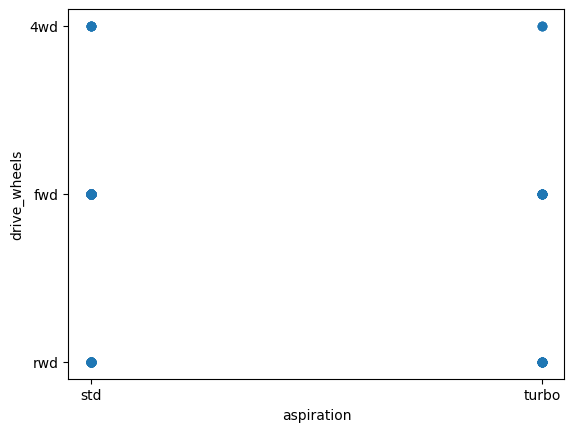

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  engine_location


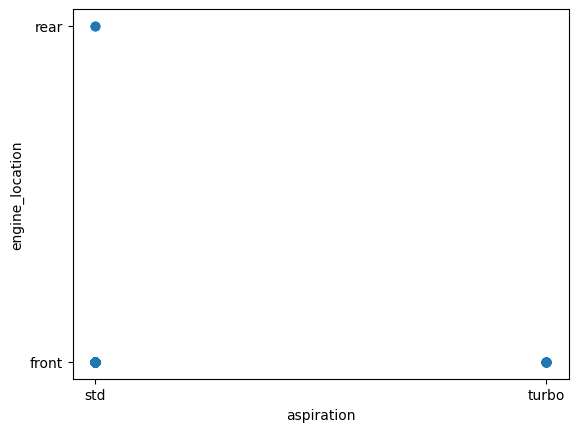

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  engine_type


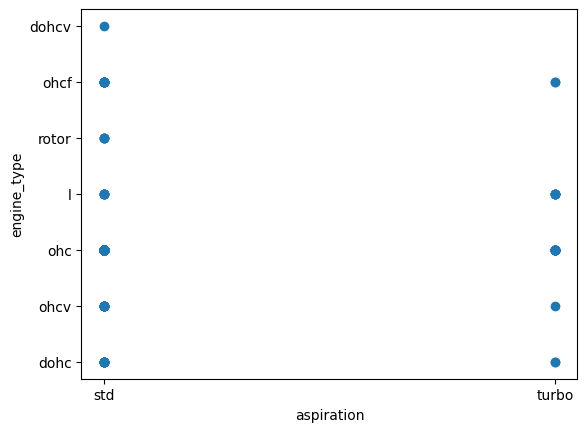

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  fuel_system


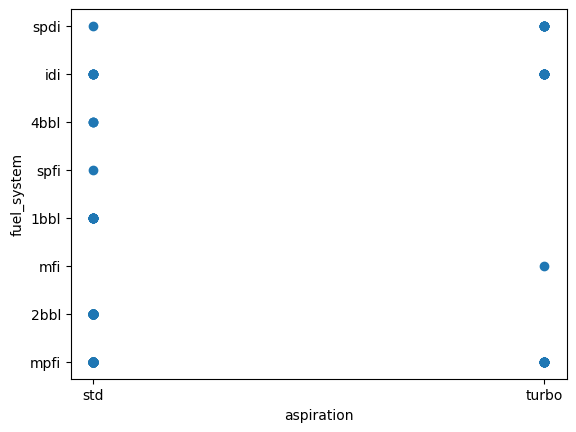

---------------------------------------------------------------------------------------- 

Analysing variables:  aspiration  and  price


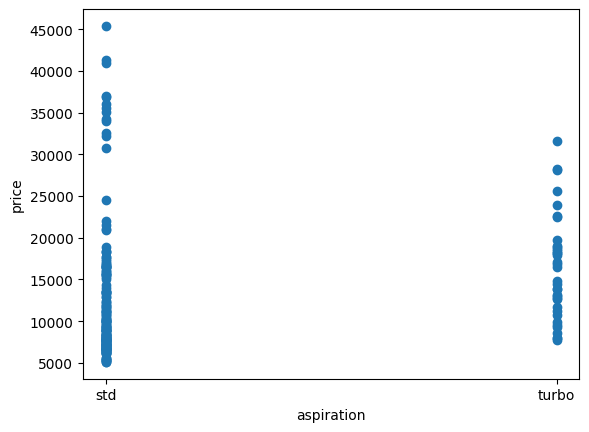

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  make


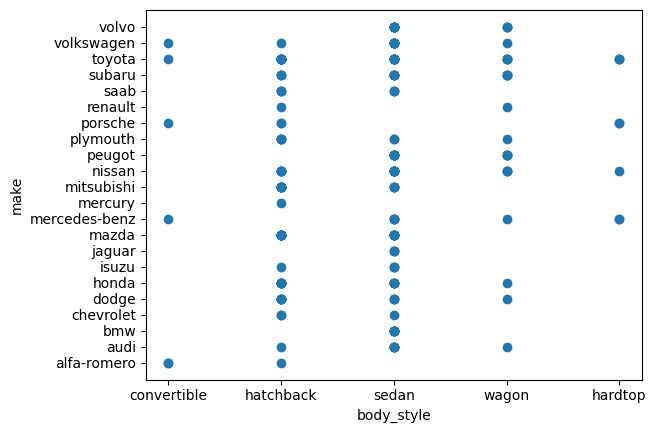

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  fuel_type


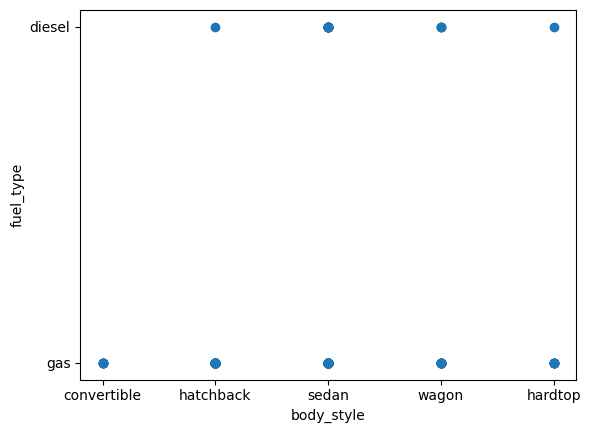

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  aspiration


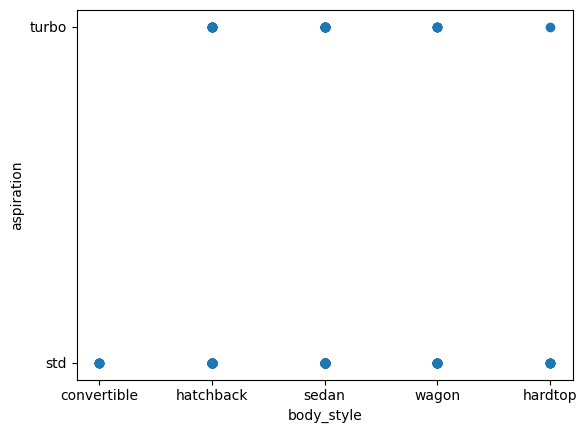

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  body_style


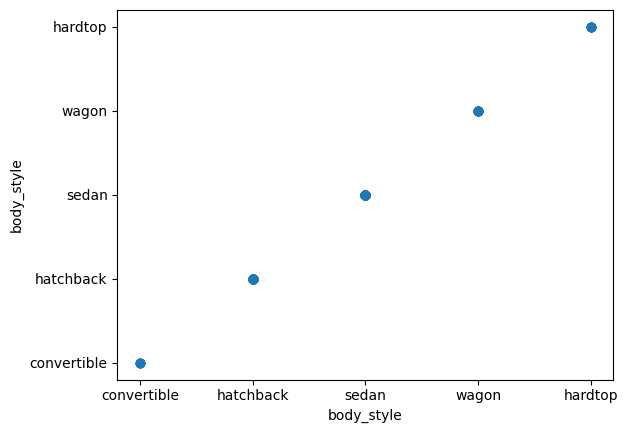

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  drive_wheels


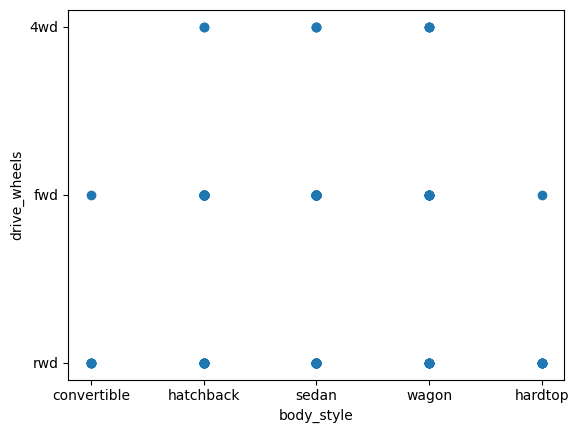

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  engine_location


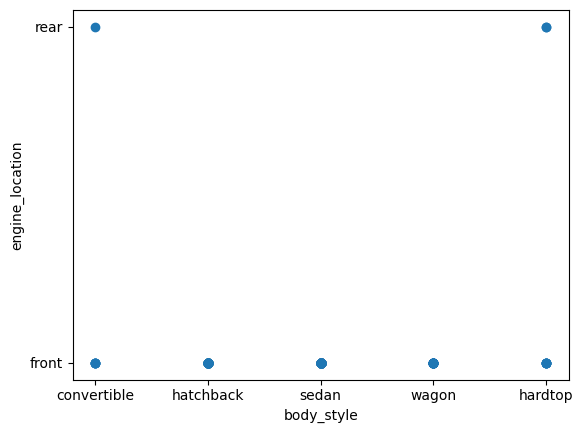

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  engine_type


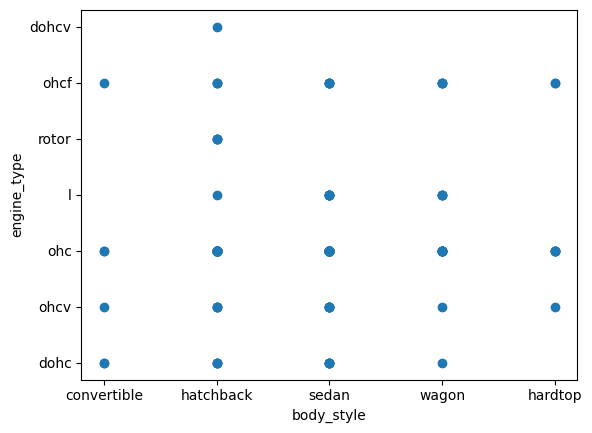

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  fuel_system


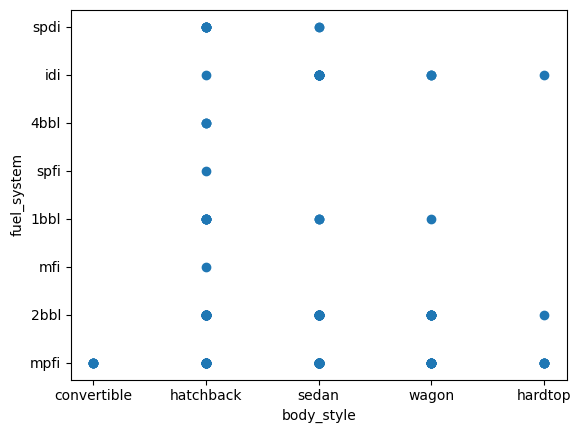

---------------------------------------------------------------------------------------- 

Analysing variables:  body_style  and  price


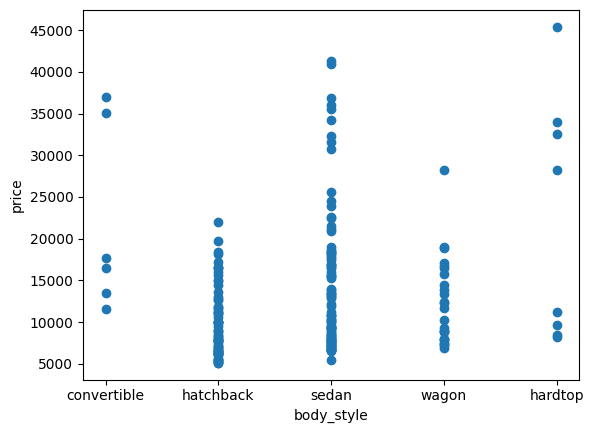

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  make


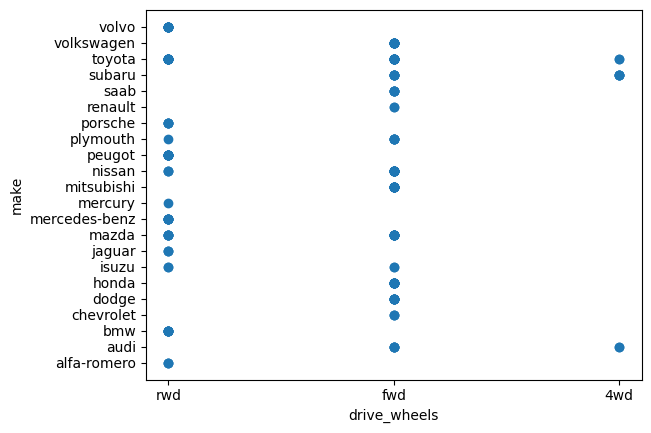

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  fuel_type


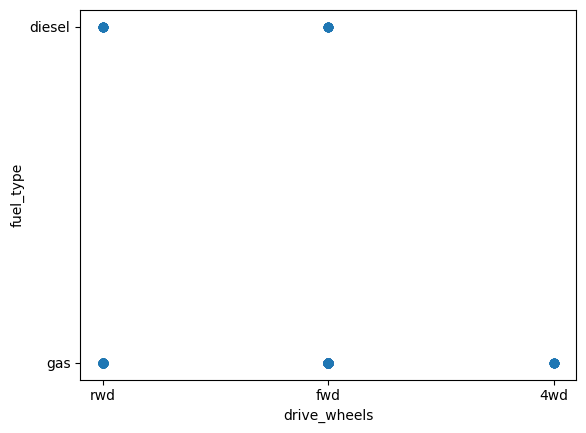

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  aspiration


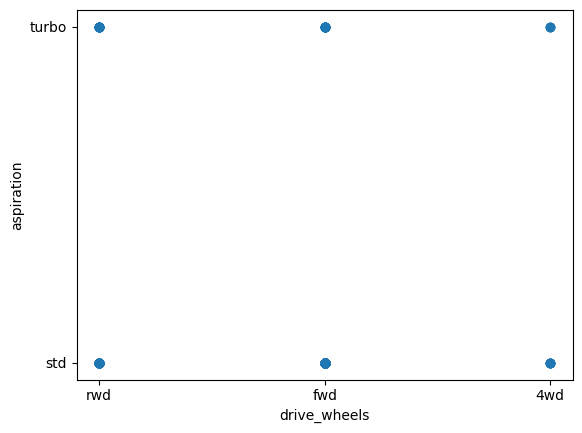

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  body_style


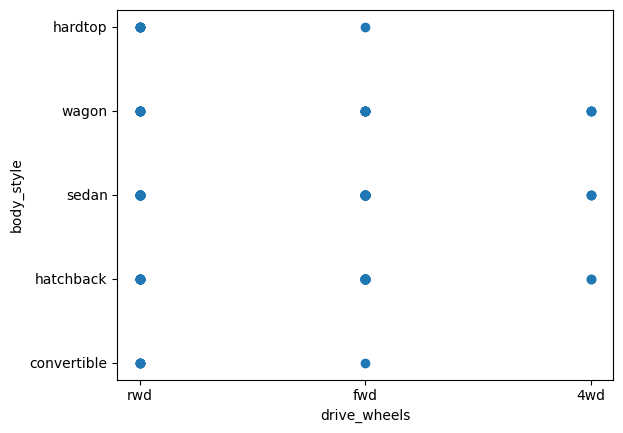

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  drive_wheels


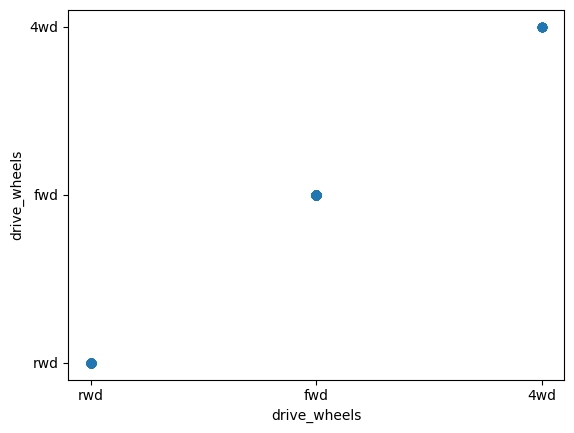

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  engine_location


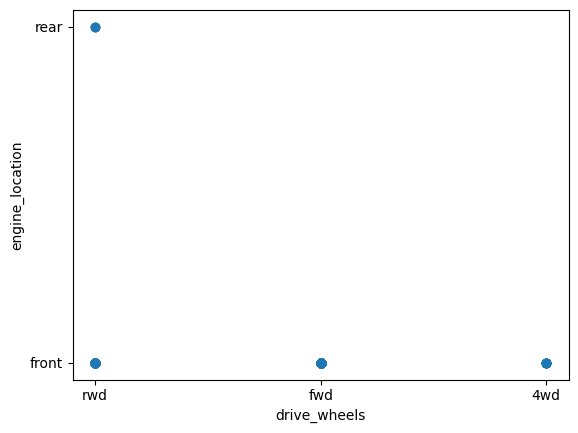

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  engine_type


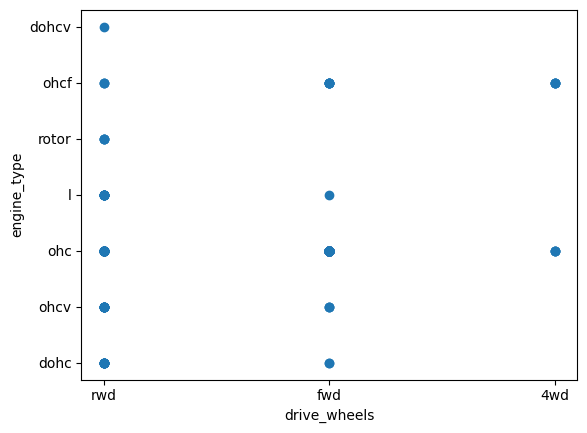

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  fuel_system


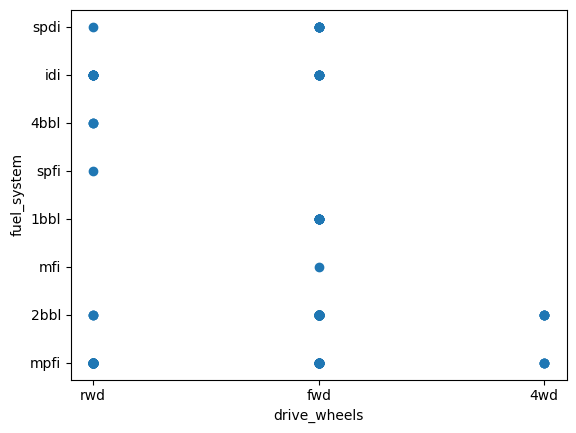

---------------------------------------------------------------------------------------- 

Analysing variables:  drive_wheels  and  price


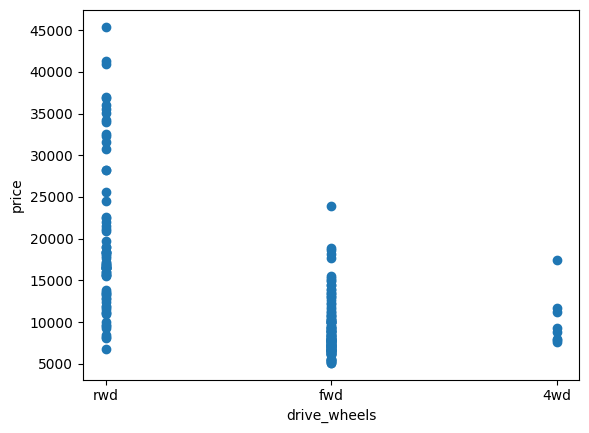

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  make


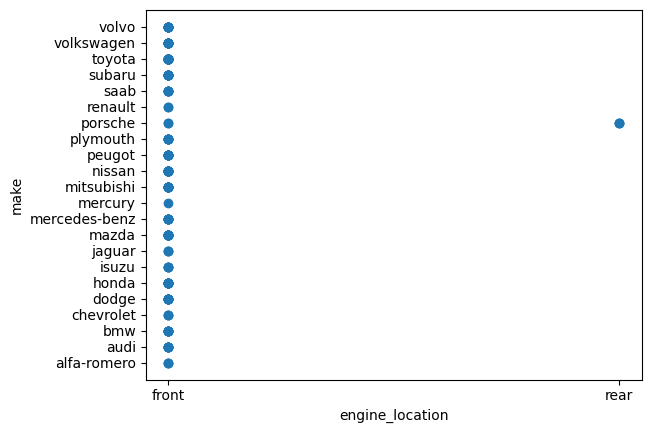

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  fuel_type


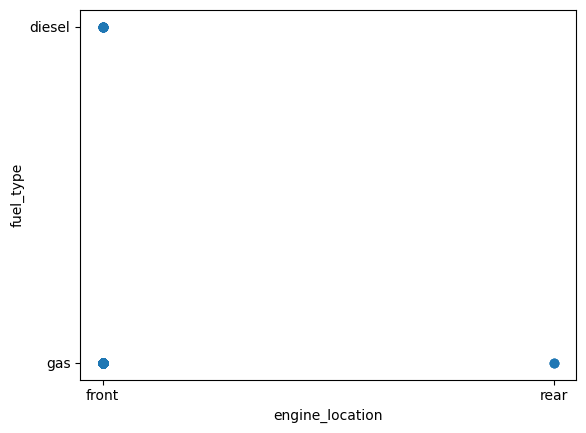

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  aspiration


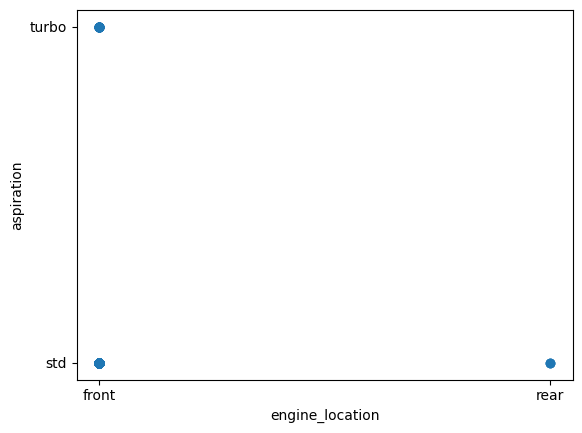

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  body_style


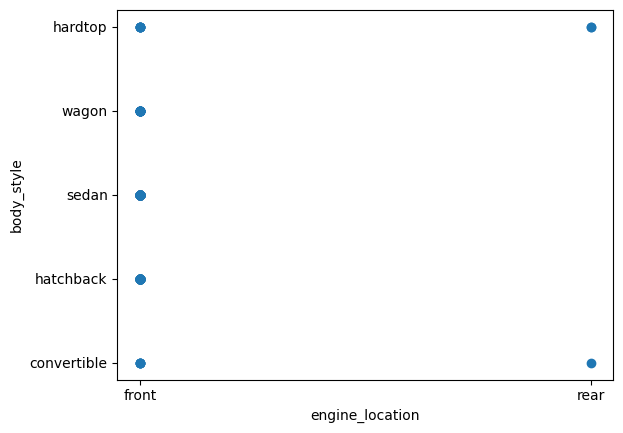

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  drive_wheels


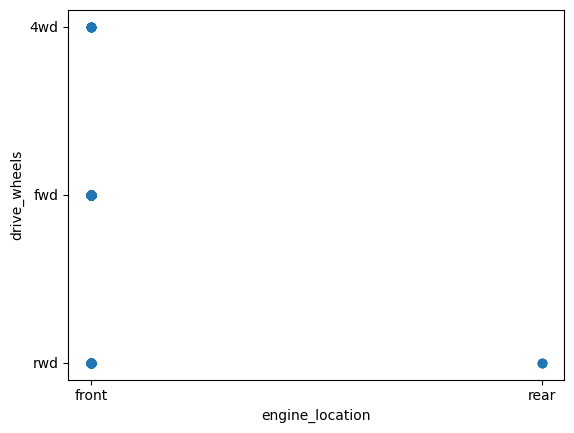

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  engine_location


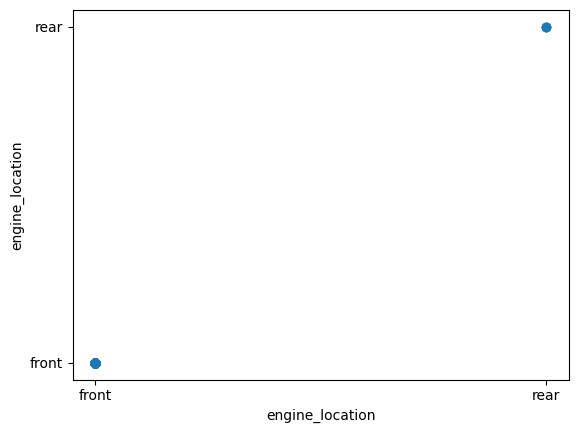

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  engine_type


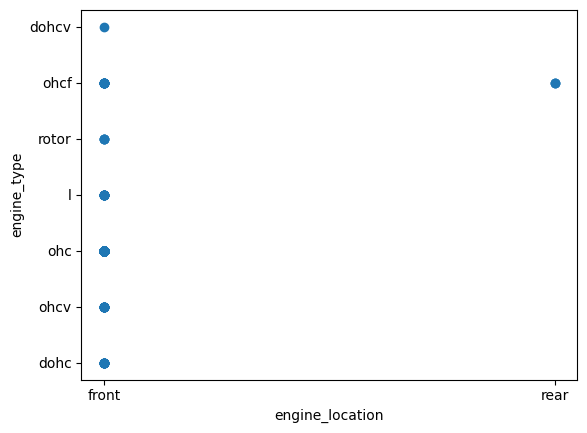

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  fuel_system


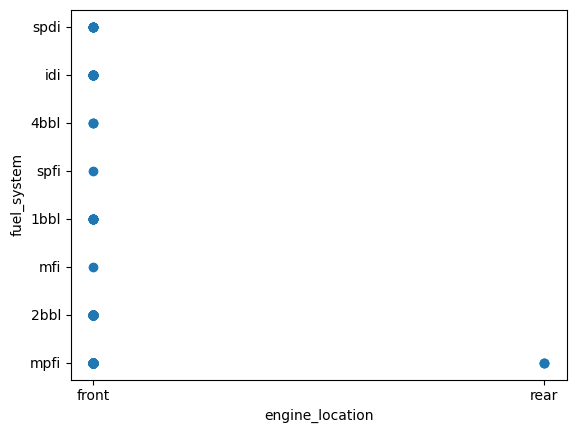

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_location  and  price


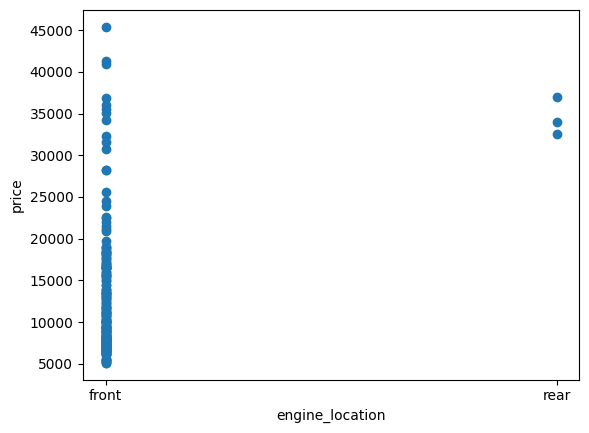

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  make


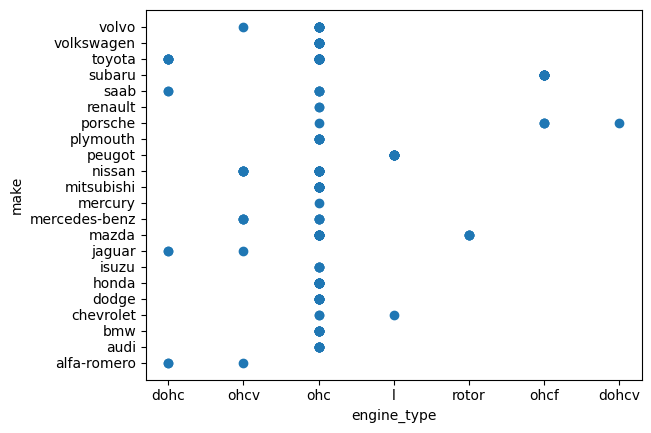

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  fuel_type


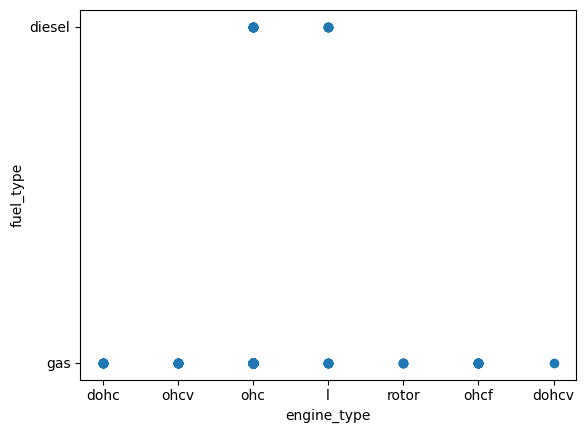

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  aspiration


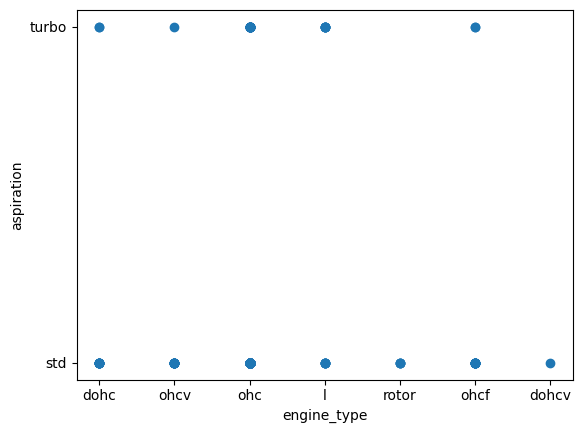

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  body_style


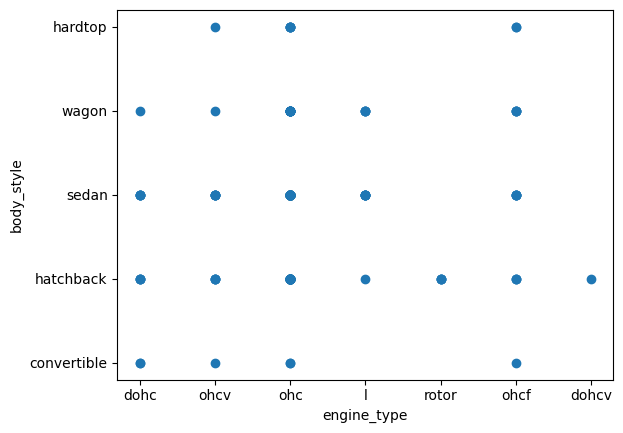

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  drive_wheels


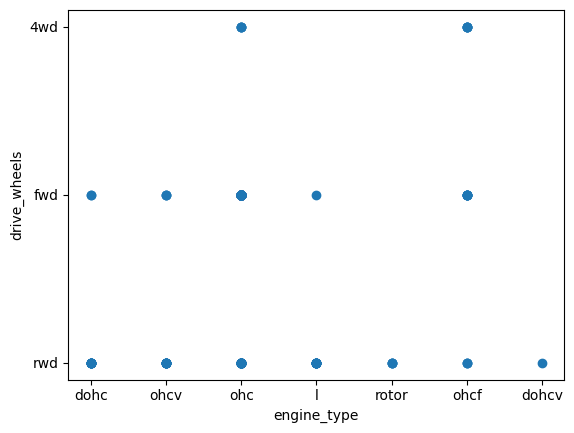

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  engine_location


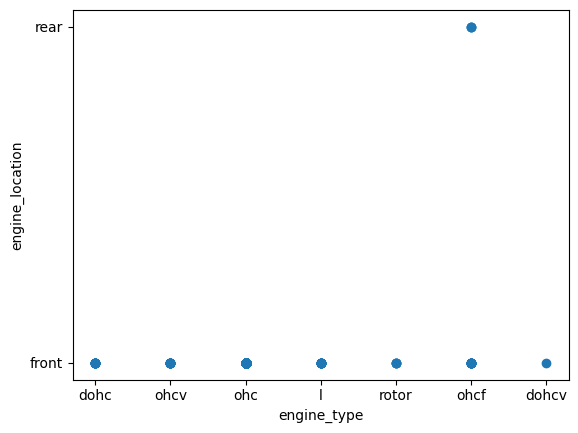

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  engine_type


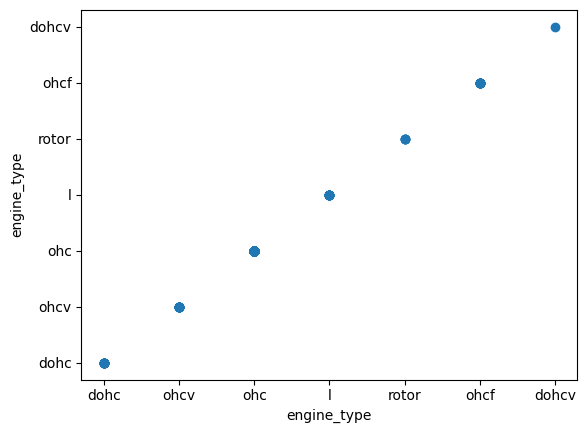

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  fuel_system


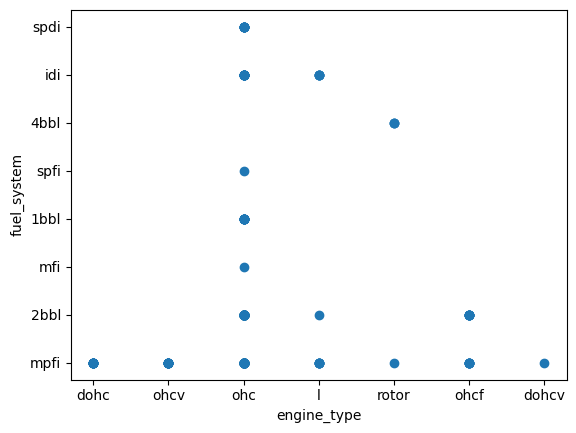

---------------------------------------------------------------------------------------- 

Analysing variables:  engine_type  and  price


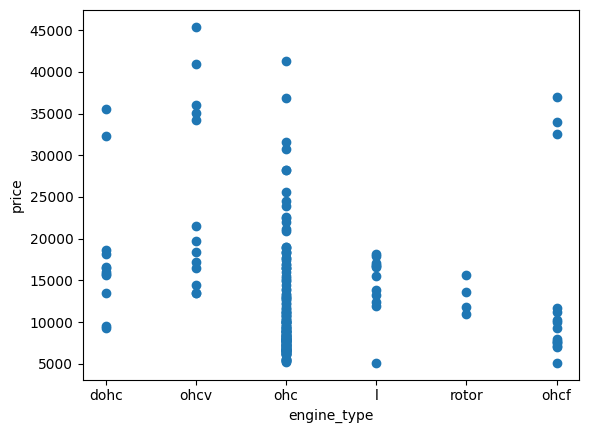

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  make


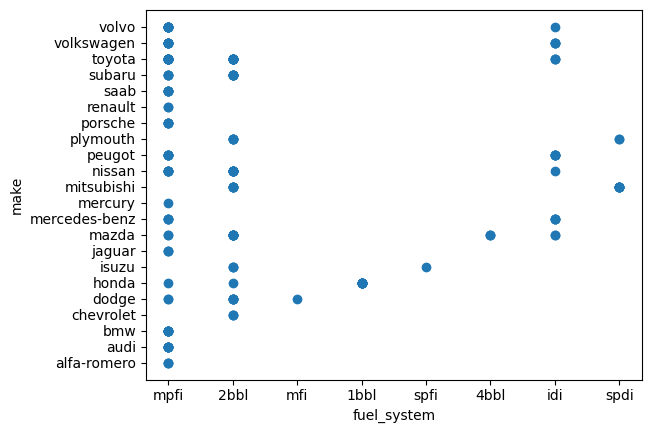

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  fuel_type


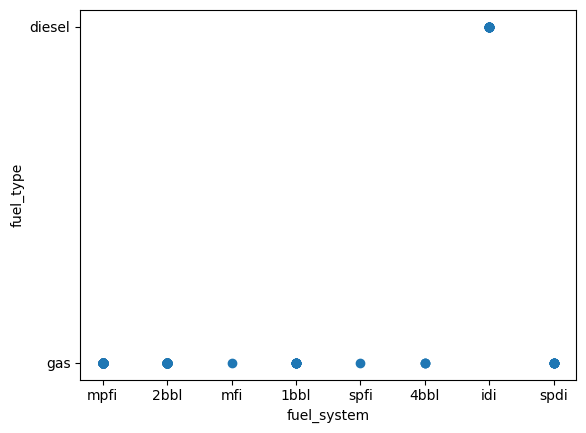

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  aspiration


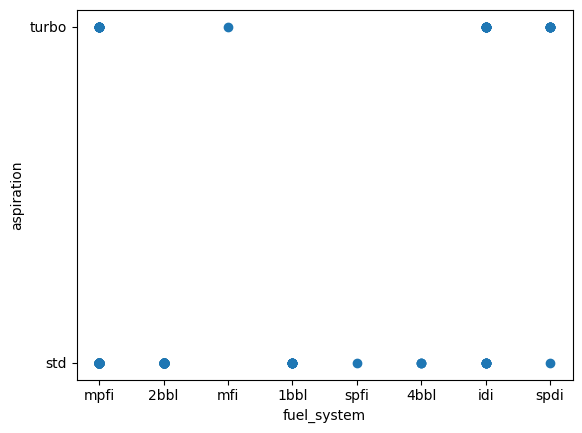

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  body_style


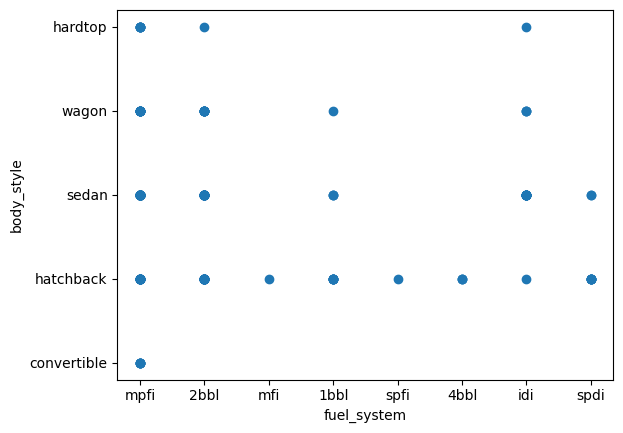

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  drive_wheels


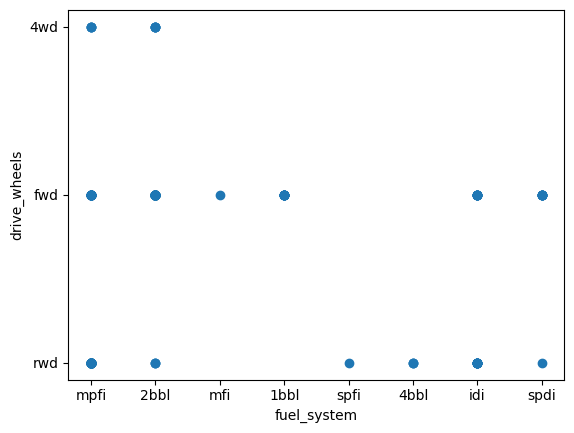

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  engine_location


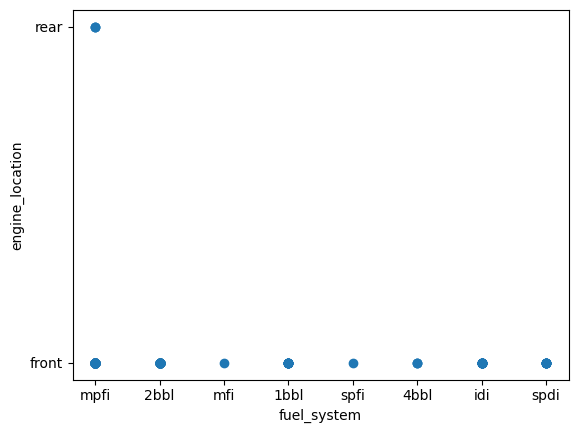

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  engine_type


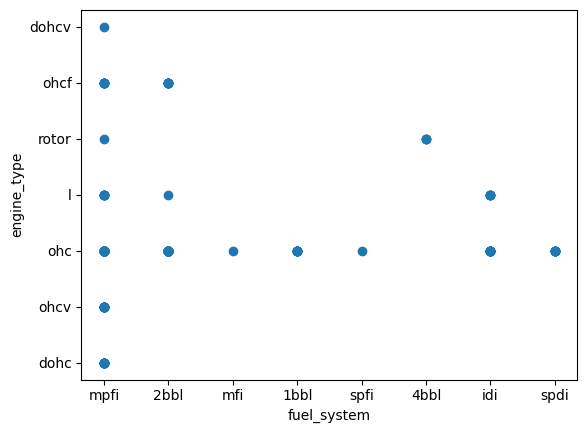

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  fuel_system


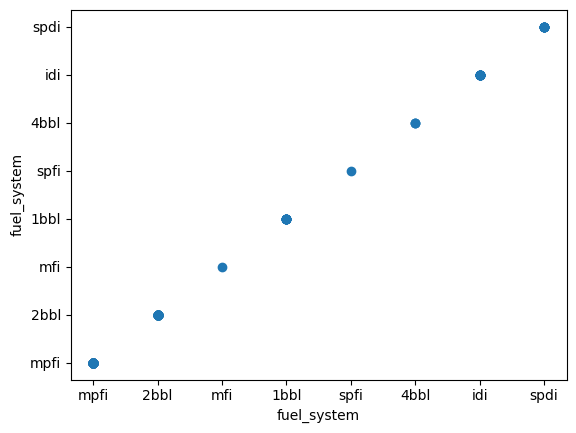

---------------------------------------------------------------------------------------- 

Analysing variables:  fuel_system  and  price


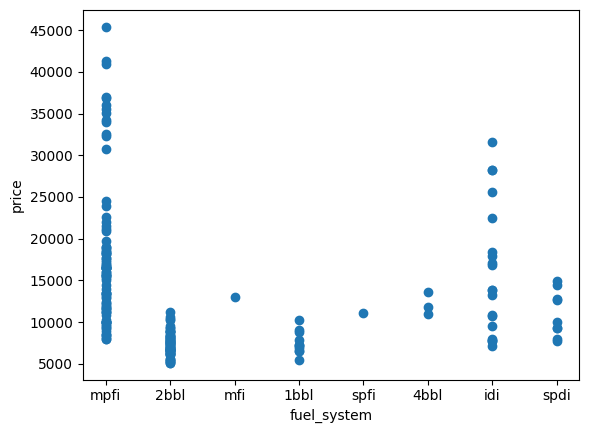

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  make


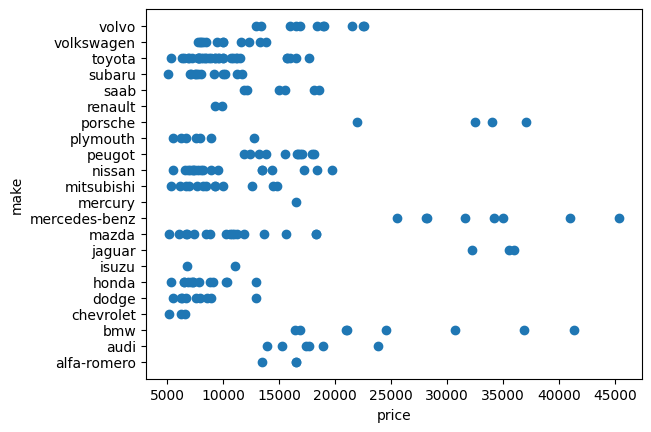

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  fuel_type


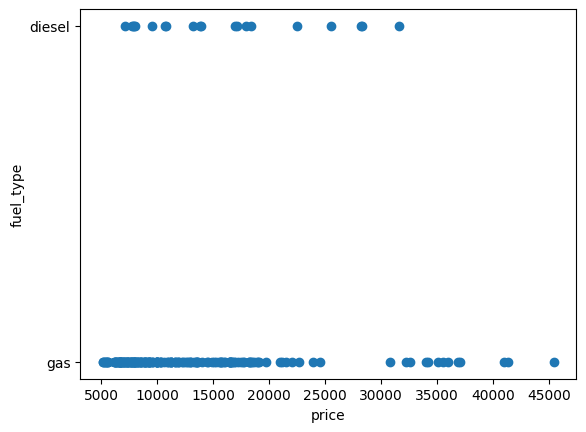

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  aspiration


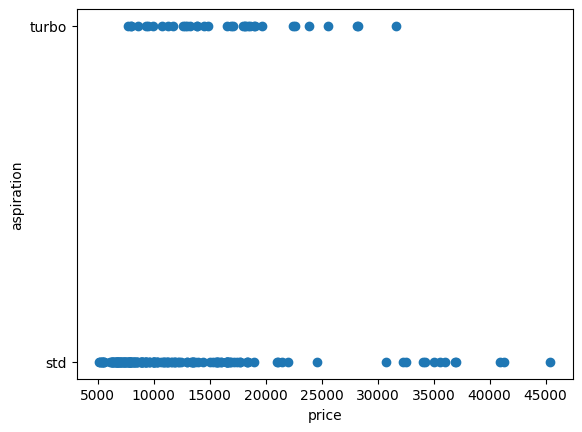

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  body_style


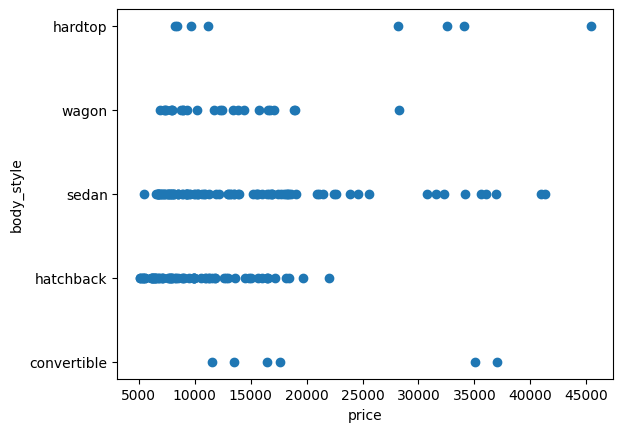

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  drive_wheels


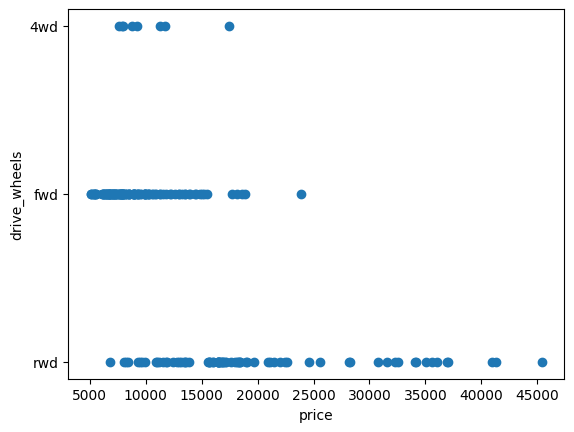

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  engine_location


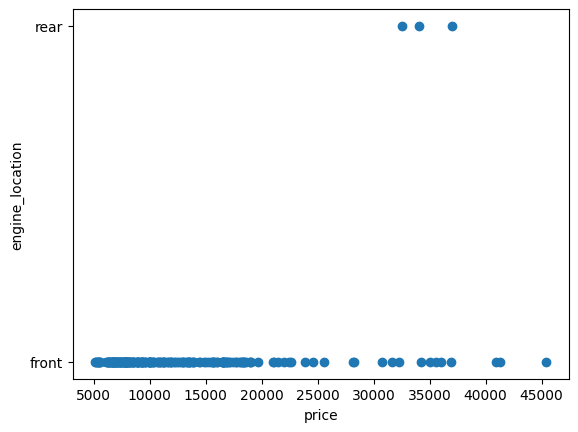

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  engine_type


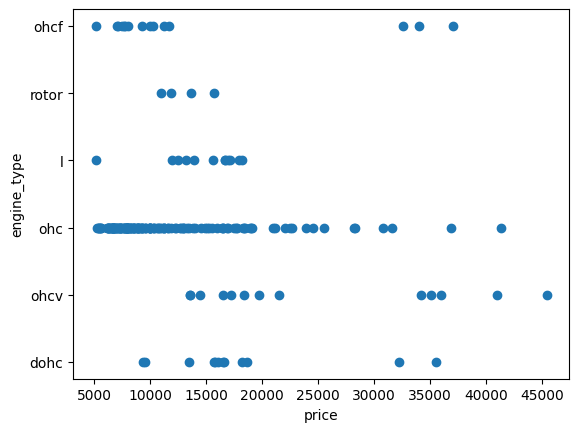

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  fuel_system


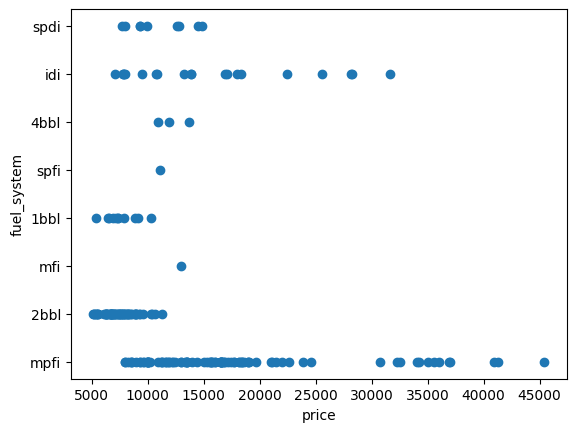

---------------------------------------------------------------------------------------- 

Analysing variables:  price  and  price


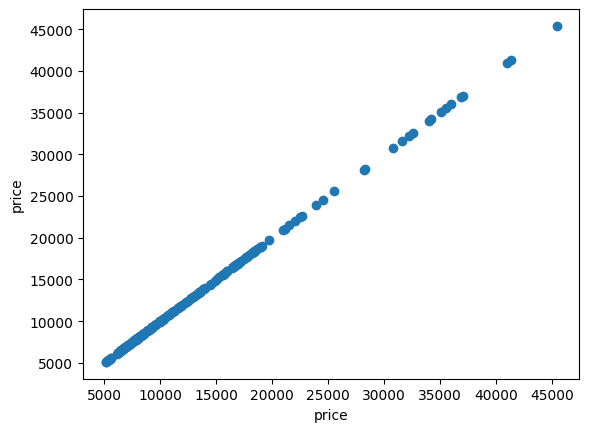

---------------------------------------------------------------------------------------- 



In [1004]:
automobile_df_cat = automobile_df_og.select_dtypes(include=['object']).copy().drop(columns=['num_doors', 'num_cylinders'])
automobile_df_cat['price'] = automobile_df_og['price']

for var in automobile_df_cat.columns:
    for var2 in automobile_df_cat.columns:
        print("Analysing variables: ", var, " and ", var2)
        plt.scatter(x = automobile_df_cat[var], y = automobile_df_og[var2])
        plt.xlabel(var)
        plt.ylabel(var2)
        plt.show()
        print("---------------------------------------------------------------------------------------- \n")

There's no clear correlation between variables. Drive wheels type seem to influence the price.

We can observe that if the brand is Porsche, Mercedes, Jaguar or BMW the price tends to bigger and therefore can be combined  at the stage of feature engineering. As for alfa romeo, mercury, peugeot and saab, that seem to be on the same range of prices. The same for audi and volvo, then chevrolet, dodge, honda, mazda, mitsubishi, nissan, plymouth, subaru, toyota, volkswagen and isuzu.

As expected, the features that contained only two classes can be explained by just one of them,and therefore one can be excluded, the fuel type (gas or diesel), the aspiration type (std or turbo), the engine location (front or rear). The fuel system 'idi' can only be found in diesel cars, giving no extra information regarding the price, so it can also be excluded.

<div class="markdown-google-sans">

## <strong>Feature Engineering and Selection</strong>
</div>

Based on your EDA, engineer new features and select the most relevant ones for your model. Justify your choices.

Starting with the results from the EDA of the numerical features, the following features will be removed: 'symboling', 'num_doors', 'stroke', 'compression_ratio', and 'peak_rpm'. Secondly, in order to try to solve multicollinearity, 'horsepower' and 'engine size' will be combined creating a new variable ('engine_power') and 'city_mpg' and 'highway_mpg' into 'mpg'. Afterwards, PCA will be tried out.

In [1054]:
features_to_drop = ['symboling', 'num_doors', 'compression_ratio', 'peak_rpm']
automobile_df_remove_numerical_features = automobile_df_wt_outliers.copy().drop(columns=features_to_drop, axis=1)

In [1055]:
automobile_df_remove_numerical_features['engine_power'] = (automobile_df_remove_numerical_features['engine_size'] * automobile_df_remove_numerical_features['horsepower'])
automobile_df_remove_numerical_features['mpg'] = (automobile_df_remove_numerical_features['city_mpg'] + automobile_df_remove_numerical_features['highway_mpg']) / 2
automobile_df_remove_numerical_features = automobile_df_remove_numerical_features.copy().drop(columns=['engine_size','horsepower', 'city_mpg','highway_mpg'], axis=1)

Moving to the categorical variables (now encoded) the following variables can be removed: 'fuel_type_gas', 'fuel_system_idi', 'aspiration_std' and 'engine_location_front'.
Afterwards, the brands bmw, porsche, jaguar and mercedes will be combine into 'make_luxury', then alfa romeo, mercury, peugeot and saab will be combined into 'make_slightly_expensive', audi and volvo into 'make_expensive', chevrolet, dodge, honda, mazda, mitsubishi, nissan, plymouth, subaru, toyota, volkswagen and isuzu into 'make_less_expensive'.

In [1056]:
features_to_drop = ['fuel_type_gas', 'fuel_system_idi', 'aspiration_std', 'engine_location_front']
automobile_df_remove_numerical_categorical_features = automobile_df_remove_numerical_features.copy().drop(columns=features_to_drop, axis=1)

In [1057]:
automobile_df_remove_numerical_categorical_features['make_luxury'] = (automobile_df_remove_numerical_categorical_features['make_mercedes-benz'] | 
                                                                                  automobile_df_remove_numerical_categorical_features['make_bmw'] | 
                                                                                  automobile_df_remove_numerical_categorical_features['make_porsche'] | 
                                                                                  automobile_df_remove_numerical_categorical_features['make_jaguar'] )


automobile_df_remove_numerical_categorical_features['make_slightly_expensive'] = (automobile_df_remove_numerical_categorical_features['make_alfa-romero'] | 
                                                                                  automobile_df_remove_numerical_categorical_features['make_mercury'] | 
                                                                                  automobile_df_remove_numerical_categorical_features['make_peugot'] | 
                                                                                  automobile_df_remove_numerical_categorical_features['make_saab'] )

automobile_df_remove_numerical_categorical_features['make_expensive'] = (automobile_df_remove_numerical_categorical_features['make_audi'] | 
                                                                        automobile_df_remove_numerical_categorical_features['make_volvo'])

automobile_df_remove_numerical_categorical_features['make_less_expensive'] = (automobile_df_remove_numerical_categorical_features['make_chevrolet'] | 
                                                                            automobile_df_remove_numerical_categorical_features['make_dodge'] | 
                                                                            automobile_df_remove_numerical_categorical_features['make_honda'] | 
                                                                            automobile_df_remove_numerical_categorical_features['make_mazda'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_mitsubishi'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_nissan'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_plymouth'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_subaru'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_toyota'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_volkswagen'] |
                                                                            automobile_df_remove_numerical_categorical_features['make_isuzu'])


automobile_df_remove_numerical_categorical_features = automobile_df_remove_numerical_categorical_features.copy().drop(columns=['make_alfa-romero','make_mercury', 'make_peugot','make_saab', 'make_audi','make_volvo', 'make_chevrolet','make_dodge', 'make_honda','make_mazda', 'make_mitsubishi','make_nissan', 'make_plymouth','make_subaru', 'make_toyota','make_volkswagen', 'make_isuzu', 'make_bmw', 'make_jaguar', 'make_mercedes-benz', 'make_porsche',
       'make_renault'], axis=1)

Lastly, running PCA.

In [1058]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X = scaler.fit_transform(automobile_df_wt_outliers.copy().drop(['price'], axis=1))
Y = automobile_df_wt_outliers['price']

pca = PCA()
X_pca = pca.fit_transform(X)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca,columns=component_names)
X_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
0,0.520837,4.219970,1.926986,1.168586,1.123597,2.704367,3.038211,4.132335,4.590540,3.987433,...,1.944120e-15,2.348216e-16,-1.755649e-16,2.802637e-16,3.178441e-16,1.482619e-16,-6.007538e-17,6.701029e-17,3.125649e-16,1.091209e-16
1,0.520837,4.219970,1.926986,1.168586,1.123597,2.704367,3.038211,4.132335,4.590540,3.987433,...,-1.804018e-15,-7.036897e-17,-1.028117e-16,-2.341339e-16,-7.446646e-17,1.110664e-16,2.764748e-16,-4.398620e-17,-4.876561e-16,-1.330763e-16
2,1.546198,3.256568,1.296494,-1.105033,-0.040163,2.182759,3.354729,2.842820,0.476445,1.191838,...,2.926583e-16,7.155283e-17,2.727497e-16,-9.119827e-17,-1.642205e-16,-1.687843e-16,-2.166546e-16,5.817786e-18,1.544194e-16,3.646818e-17
3,-0.315031,0.241757,-1.314255,-1.281092,-0.804567,-0.064333,-1.749715,-1.200555,0.565321,2.077551,...,-1.266114e-15,5.275469e-16,-4.764129e-17,-3.193946e-16,3.318135e-16,1.924828e-16,1.678213e-16,1.137225e-16,1.842623e-16,-1.510017e-17
4,1.290675,1.166986,-2.054435,-0.482511,-0.029462,-0.882934,-1.106336,-1.134920,-0.339903,2.618689,...,-1.086736e-15,6.945865e-16,4.741177e-16,3.269046e-16,5.557032e-17,-7.893207e-17,-4.935908e-17,5.121827e-18,-7.559578e-17,3.853871e-17


In [1059]:
def plotVariance(pca):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))
    fig.set(figwidth=8, dpi=100)
    return axs

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

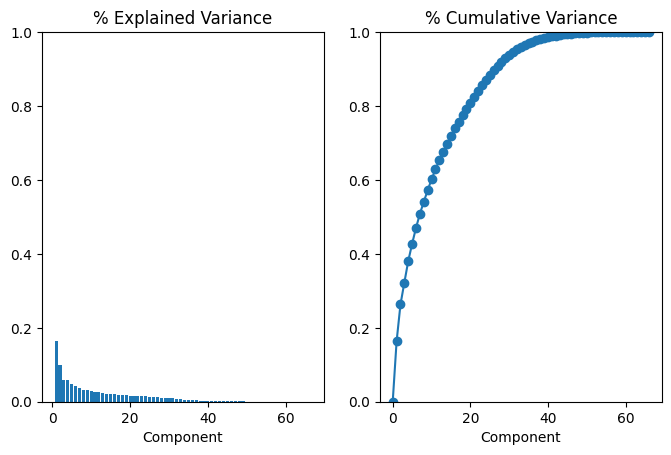

In [1060]:
plotVariance(pca)

Only 20% of explained variance for one component, therefore, around 40 components will be needed to reach 100% cumulative variance.

<div class="markdown-google-sans">

## <strong>Machine Learning Model</strong>
</div>

Build a machine learning model to predict the "price" variable.
Explain your choice of model and any hyperparameters you tune. Use appropriate validation techniques.

In [1061]:
scaler = StandardScaler()

I will use a Linear Regression model due to its simplicity and will only progress to more complex models if the previous one fails to obtain good results. Moreover, I will retrain and assess the results for the model after each decision that was taken in the previous sections, starting with a model with all the features (benchmark). I will use a grid search with cross validation to tune any hyperparameter.

<div class="markdown-google-sans">
  <h3> Benchmark </h3>
</div>

In [1062]:
lm = LR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params =  [{'fit_intercept': [True, False]}]

df_train, df_test = train_test_split(automobile_df_cat_var_enc, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test = scaler.fit_transform(df_test)
y_test = df_test['price']
model_cv_benchmark = GridSearchCV(estimator = lm, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_benchmark.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> After outlier removal </h3>
</div>

In [1063]:
lm = LR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'fit_intercept': [True, False]}]

df_train, df_test = train_test_split(automobile_df_wt_outliers, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_no_outliers = scaler.fit_transform(df_test)
y_test_no_outliers = df_test['price']
model_cv_no_outliers = GridSearchCV(estimator = lm, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_no_outliers.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> Using PCA components </h3>
</div>

Using PCA components:

In [1064]:
lm = LR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'fit_intercept': [True, False]}]

df_copy = automobile_df_wt_outliers.copy()
df_PCA = X_pca.iloc[: , [0, 40]].copy()
df_PCA['price'] = automobile_df_wt_outliers['price']

df_train, df_test = train_test_split(df_PCA.dropna(), 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_pca = scaler.fit_transform(df_test)
y_test_pca = df_test['price']
model_cv_pca = GridSearchCV(estimator = lm, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_pca.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> After numerical feature selection/engineering </h3>
</div>

In [1065]:
lm = LR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'fit_intercept': [True, False]}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_remove_numerical_features = scaler.fit_transform(df_test)
y_test_remove_numerical_features = df_test['price']
model_cv_remove_numerical_features = GridSearchCV(estimator = lm, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_remove_numerical_features.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> After numerical and categorical feature selection/engineering </h3>
</div>

In [1066]:
lm = LR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'fit_intercept': [True, False]}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_categorical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_remove_numerical_categorical_features = scaler.fit_transform(df_test)
y_test_remove_numerical_categorical_features = df_test['price']
model_cv_remove_numerical_categorical_features = GridSearchCV(estimator = lm, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_remove_numerical_categorical_features.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> After visual selection of features </h3>
</div>

Using only the numerical features that presented a relationship with the price on the scatter plots, plus all the categorical variables.

In [1067]:
lm = LR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'fit_intercept': [True, False]}]

variables = []
numerical_variables = ['length', 'width', 'curb_weight', 'num_cylinders', 'engine_size', 'horsepower', 'city_mpg', 'highway_mpg']
variables.extend(numerical_variables)
cat_variables = list(automobile_df_wt_outliers.copy().select_dtypes(include=['bool']).columns)
variables.extend(cat_variables)
variables.append('price')

df_train, df_test = train_test_split(automobile_df_wt_outliers[variables], 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_visual_selection = scaler.fit_transform(df_test)
y_test_visual_selection = df_test['price']
model_cv_visual_selection = GridSearchCV(estimator = lm, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_visual_selection.fit(X_train, y_train)



Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> Using RFE for selection of features </h3>
</div>

Using recursive feature elimination to select the features

In [1068]:
lm = LR()
rfe = RFE(lm) 
folds = KFold(n_splits = 5, shuffle = False)
hyper_params =  [{'n_features_to_select': list(range(1, 63))}]

df_train, df_test = train_test_split(automobile_df_cat_var_enc, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_rfe = scaler.fit_transform(df_test)
y_test_rfe = df_test['price']
model_cv_rfe = GridSearchCV(estimator = rfe, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)
model_cv_rfe.fit(X_train, y_train)


Fitting 5 folds for each of 62 candidates, totalling 310 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h2> Different Models </h2>
</div>

Now some sklearn model implementations will be tried out in ascending order of complexity to establish if better results can be obtained.

<div class="markdown-google-sans">
  <h3> With Ridge model </h3>
</div>

Ridge Regression is a regularized linear regression technique and is used when we have many features, which is the case. They can help prevent overfitting and improve model generalization. The tuned hyper parameter was the solver used by the regression model. 

In [1069]:
from sklearn.linear_model import Ridge

ridge = Ridge()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'solver': ['sparse_cg', 'auto', 'saga', 'lsqr', 'svd', 'sag', 'cholesky']}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_categorical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_ridge= scaler.fit_transform(df_test)
y_test_ridge = df_test['price']
model_cv_ridge = GridSearchCV(estimator = ridge, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_ridge.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid=[{'solver': ['sparse_cg', 'auto', 'saga', 'lsqr', 'svd',
                                     'sag', 'cholesky']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> With decision trees and random forest models </h3>
</div>

Decision trees and random forests are non-linear regression models that can handle complex relationships. The tuned hyper parameter for the random forest was the number of estimators used by the regression model and for the decision tree the criterion to be used in the split. These models are capable to handle both categorical variables but the current implementation of the sklearn appears to not be able to process categorical.

In [1070]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params =  [{'n_estimators': list(range(1, 100))}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_categorical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_rfr = scaler.fit_transform(df_test)
y_test_rfr = df_test['price']
model_cv_rfr = GridSearchCV(estimator = rfr, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)
model_cv_rfr.fit(X_train, y_train)


Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1071]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params =  [{'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"]}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_categorical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_dtr= scaler.fit_transform(df_test)
y_test_dtr = df_test['price']
model_cv_dtr = GridSearchCV(estimator = dtr, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)
model_cv_dtr.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> With SVR model </h3>
</div>

Support Vector Regression (SVR) using support vector machines to find the best-fitting line (or hyperplane in higher dimensions) to predict the car prices. It can handle non-linear relationships with the help of kernel functions. The hyperparameter tuned was the kernel function due to its impact on the prediction.

In [1072]:
from sklearn.svm import SVR 

svr = SVR()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_categorical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_svr = scaler.fit_transform(df_test)
y_test_svr = df_test['price']
model_cv_svr = GridSearchCV(estimator = svr, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_svr.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVR(),
             param_grid=[{'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">
  <h3> With gradient boosting model </h3>
</div>

They are known for their ability to capture intricate patterns in the data. The tuned hyper parameter was the loss function to be optimized.

In [1073]:
from sklearn.ensemble import GradientBoostingRegressor 

gbr = GradientBoostingRegressor()
folds = KFold(n_splits = 5, shuffle = False)
hyper_params = [{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}]

df_train, df_test = train_test_split(automobile_df_remove_numerical_categorical_features, 
                                    train_size = 0.7, 
                                    test_size = 0.3,
                                    random_state = 100)

X_train  = scaler.fit_transform(df_train)
y_train = df_train['price']

X_test_gbr = scaler.fit_transform(df_test)
y_test_gbr = df_test['price']
model_cv_gbr = GridSearchCV(estimator = gbr, 
                    param_grid = hyper_params, 
                    scoring= 'neg_mean_squared_error', 
                    cv = folds, 
                    verbose = 1,
                    return_train_score=True)      

model_cv_gbr.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid=[{'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

<div class="markdown-google-sans">

## <strong>Evaluation and Interpretation</strong>
</div>

Evaluate the performance of your model using appropriate metrics. 
Interpret your model's predictions, and discuss its strengths and weaknesses.

<div class="markdown-google-sans">
  <h3> Benchmark </h3>
</div>

In [1109]:
print(model_cv_benchmark.cv_results_["mean_train_score"])
print(model_cv_benchmark.cv_results_["mean_test_score"])
print(model_cv_benchmark.best_params_)
print(model_cv_benchmark.best_score_)

[-1.757e-22 -2.661e+07]
[-1.440e+02 -6.084e+10]
{'fit_intercept': True}
-144.02806690136646


In [1075]:
price = model_cv_benchmark.predict(X_test)
rms = mean_squared_error(y_test, price, squared=False)
r2 = r2_score(y_test, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 955.31
The explained variance by the optimal model is 0.99


The model seem to have overfit when looking at the train error when compared with the validation and test set. That might be explained by the use of all the features on the benchmark model, creating an overly complex linear regression.

<div class="markdown-google-sans">
  <h3> After outlier removal </h3>
</div>

In [1108]:
print(model_cv_no_outliers.cv_results_["mean_train_score"])
print(model_cv_no_outliers.cv_results_["mean_test_score"])
print(model_cv_no_outliers.best_params_)
print(model_cv_no_outliers.best_score_)

[-2.552e-22 -6.003e+07]
[-2.769e+02 -5.130e+10]
{'fit_intercept': True}
-276.9046764741032


In [1077]:
price = model_cv_no_outliers.predict(X_test_no_outliers)
rms = mean_squared_error(y_test_no_outliers, price, squared=False)
r2 = r2_score(y_test_no_outliers, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 724.34
The explained variance by the optimal model is 0.99


Once again it appears to overfit, for the same reason mentioned. However the error decreases when removing the outliers.

<div class="markdown-google-sans">
  <h3> Using PCA components </h3>
</div>

In [1107]:
print(model_cv_pca.cv_results_["mean_train_score"])
print(model_cv_pca.cv_results_["mean_test_score"])
print(model_cv_pca.best_params_)
print(model_cv_pca.best_score_)

[-2.080e-23 -1.763e+08]
[-1.948e-23 -1.936e+08]
{'fit_intercept': True}
-1.9484480042621435e-23


In [1079]:
price = model_cv_pca.predict(X_test_pca)
rms = mean_squared_error(y_test_pca, price, squared=False)
r2 = r2_score(y_test_pca, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 1255.56
The explained variance by the optimal model is 0.98


By using the PCA components the overfit seems to decrease, at least on the validation set. However the error on the test set increased and the explained variance also decreased.

<div class="markdown-google-sans">
  <h3> After selecting numerical features </h3>
</div>

In [1106]:
print(model_cv_remove_numerical_features.cv_results_["mean_train_score"])
print(model_cv_remove_numerical_features.cv_results_["mean_test_score"])
print(model_cv_remove_numerical_features.best_params_)
print(model_cv_remove_numerical_features.best_score_)

[-6.087e-22 -6.149e+07]
[-5.321e-22 -5.118e+10]
{'fit_intercept': True}
-5.321371049212563e-22


In [1081]:
price = model_cv_remove_numerical_features.predict(X_test_remove_numerical_features)
rms = mean_squared_error(y_test_remove_numerical_features, price, squared=False)
r2 = r2_score(y_test_remove_numerical_features, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 720.20
The explained variance by the optimal model is 0.99


The selection of only some numerical variables and the engineering of new ones seem to sightly decrease the error of the model when compared with the model after outlier removal.

<div class="markdown-google-sans">
  <h3> After selecting numerical and categorical features </h3>
</div>

In [1105]:
print(model_cv_remove_numerical_categorical_features.cv_results_["mean_train_score"])
print(model_cv_remove_numerical_categorical_features.cv_results_["mean_test_score"])
print(model_cv_remove_numerical_categorical_features.best_params_)
print(model_cv_remove_numerical_categorical_features.best_score_)

[-2.656e-22 -1.295e+08]
[-2.654e-22 -1.764e+10]
{'fit_intercept': True}
-2.654481670012134e-22


In [1083]:
price = model_cv_remove_numerical_categorical_features.predict(X_test_remove_numerical_categorical_features)
rms = mean_squared_error(y_test_remove_numerical_categorical_features, price, squared=False)
r2 = r2_score(y_test_remove_numerical_categorical_features, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 720.20
The explained variance by the optimal model is 0.99


The selection/engineering of the categorical variables appears to have no effect on the test set error, which might be caused by the majority of the changes being removing one of the one hot encoded features with two classes.

<div class="markdown-google-sans">
  <h3> Visual selection of features </h3>
</div>

In [1104]:
print(model_cv_visual_selection.cv_results_["mean_train_score"])
print(model_cv_visual_selection.cv_results_["mean_test_score"])
print(model_cv_visual_selection.best_params_)
print(model_cv_visual_selection.best_score_)

[-2.627e-22 -6.201e+07]
[-3.123e-22 -5.113e+10]
{'fit_intercept': True}
-3.12290223403502e-22


In [1085]:
price = model_cv_visual_selection.predict(X_test_visual_selection)
rms = mean_squared_error(y_test_visual_selection, price, squared=False)
r2 = r2_score(y_test_visual_selection, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 720.20
The explained variance by the optimal model is 0.99


The visual selection of features presented the same error as the feature selection/engineering process, meaning that the scatter plots captured well the relationship among the data.

<div class="markdown-google-sans">
  <h3> Using RFE selection of features </h3>
</div>

In [1103]:
print(model_cv_rfe.cv_results_["mean_train_score"])
print(model_cv_rfe.cv_results_["mean_test_score"])
print(model_cv_rfe.best_params_)
print(model_cv_rfe.best_score_)

[-2.375e-24 -2.035e-24 -9.833e-24 -5.794e-23 -3.089e-23 -9.357e-24
 -1.571e-23 -4.694e-23 -6.152e-23 -1.854e-23 -3.958e-23 -1.977e-22
 -7.482e-23 -1.335e-22 -7.507e-23 -5.448e-23 -1.246e-22 -1.430e-22
 -8.520e-23 -6.334e-23 -1.162e-22 -9.188e-23 -1.403e-22 -6.966e-23
 -1.844e-22 -8.575e-23 -6.774e-23 -5.456e-23 -7.325e-23 -1.004e-22
 -3.836e-22 -4.359e-22 -1.748e-22 -1.210e-22 -1.404e-22 -9.688e-23
 -3.504e-22 -4.197e-22 -5.158e-22 -1.557e-22 -2.308e-22 -2.042e-22
 -7.317e-23 -2.475e-22 -1.141e-22 -6.812e-23 -8.719e-23 -1.853e-22
 -2.085e-22 -2.817e-22 -2.150e-22 -2.899e-22 -3.134e-22 -2.964e-22
 -1.287e-22 -1.613e-22 -2.663e-22 -2.416e-22 -1.631e-22 -3.255e-22
 -1.889e-22 -2.103e-22]
[-2.505e-24 -1.300e-24 -9.129e-24 -5.375e-23 -2.808e-23 -8.514e-24
 -1.546e-23 -6.294e-23 -6.113e-23 -1.054e-23 -4.150e-23 -2.035e-22
 -8.509e-23 -1.073e-22 -6.575e-23 -3.513e-23 -9.633e-23 -2.458e-22
 -1.436e-22 -6.499e-23 -1.209e-22 -8.840e-23 -1.175e-22 -7.329e-23
 -1.411e-22 -1.065e-22 -5.822e-23 -4.0

In [1087]:
price = model_cv_rfe.predict(X_test_rfe)
rms = mean_squared_error(y_test_rfe, price, squared=False)
r2 = r2_score(y_test_rfe, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 956.58
The explained variance by the optimal model is 0.99


The RFE presented a slightly bigger error.

<div class="markdown-google-sans">
  <h3> Ridge Model </h3>
</div>

In [1102]:
print(model_cv_ridge.cv_results_["mean_train_score"])
print(model_cv_ridge.cv_results_["mean_test_score"])
print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

[-69943.056 -69890.564 -77248.464 -69894.565 -69890.564 -73531.451
 -69890.564]
[-234305.793 -234221.595 -269410.037 -233875.855 -234221.595 -251880.754
 -234221.595]
{'solver': 'lsqr'}
-233875.85516328862


In [1089]:
price = model_cv_ridge.predict(X_test_ridge)
rms = mean_squared_error(y_test_ridge, price, squared=False)
r2 = r2_score(y_test_ridge, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 868.46
The explained variance by the optimal model is 0.99


The model seem to have underfitted, having big errors on the training and validation set. 

<div class="markdown-google-sans">
  <h3> Random Forest Model </h3>
</div>

In [1101]:
print(model_cv_rfr.cv_results_["mean_train_score"])
print(model_cv_rfr.cv_results_["mean_test_score"])
print(model_cv_rfr.best_params_)
print(model_cv_rfr.best_score_)

[-1322814.571 -1034692.178  -599199.2    -530399.674  -553545.261
  -344036.412  -337272.013  -271324.141  -290904.492  -431116.556
  -386203.05   -252393.151  -334138.005  -223538.104  -283285.234
  -241689.271  -154392.222  -294052.502  -214268.316  -210506.772
  -215728.721  -238074.196  -241527.707  -214766.671  -159273.163
  -205008.665  -180576.702  -184485.972  -233898.839  -172195.293
  -197711.885  -208588.479  -167348.821  -162341.345  -182940.12
  -196489.619  -259639.852  -205184.46   -179550.726  -217130.206
  -172613.172  -170367.258  -212648.124  -168563.413  -182742.877
  -190610.179  -145457.126  -214841.201  -190711.758  -129559.408
  -164883.547  -171774.79   -187592.531  -167505.074  -194163.347
  -160072.422  -164332.818  -199670.133  -151818.464  -195854.468
  -160626.644  -185421.823  -170018.115  -177391.483  -200922.883
  -176751.049  -179086.277  -159863.415  -169420.083  -178912.995
  -160864.853  -159975.491  -211381.072  -163332.468  -150427.888
  -164271.0

In [1091]:
price = model_cv_rfr.predict(X_test_rfr)
rms = mean_squared_error(y_test_rfr, price, squared=False)
r2 = r2_score(y_test_rfr, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 1107.15
The explained variance by the optimal model is 0.98


The model seem to have underfitted, having big errors on the training and validation set. 

<div class="markdown-google-sans">
  <h3> Decision Tree Model </h3>
</div>

In [1100]:
print(model_cv_dtr.cv_results_["mean_train_score"])
print(model_cv_dtr.cv_results_["mean_test_score"])
print(model_cv_dtr.best_params_)
print(model_cv_dtr.best_score_)

[0. 0. 0. 0.]
[-6093714.393 -2511776.3   -3280786.764 -2704753.886]
{'criterion': 'friedman_mse'}
-2511776.3


In [1093]:
price = model_cv_dtr.predict(X_test_dtr)
rms = mean_squared_error(y_test_dtr, price, squared=False)
r2 = r2_score(y_test_dtr, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 1327.16
The explained variance by the optimal model is 0.98


The model seem to have overfitted the training set.

<div class="markdown-google-sans">
  <h3> Support Vector Regression Model </h3>
</div>

In [1099]:
print(model_cv_svr.cv_results_["mean_train_score"])
print(model_cv_svr.cv_results_["mean_test_score"])
print(model_cv_svr.best_params_)
print(model_cv_svr.best_score_)

[-65602741.942 -53371312.333 -65792915.191 -65601027.721]
[-66427305.416 -54028236.484 -66461778.726 -66259271.87 ]
{'kernel': 'linear'}
-54028236.48359847


In [1095]:
price = model_cv_svr.predict(X_test_svr)
rms = mean_squared_error(y_test_svr, price, squared=False)
r2 = r2_score(y_test_svr, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 7938.21
The explained variance by the optimal model is 0.11


The model seem to have underfitted, having big errors on the training, validation and test set. 

<div class="markdown-google-sans">
  <h3> Gradient boosting model </h3>
</div>

In [1098]:
print(model_cv_gbr.cv_results_["mean_train_score"])
print(model_cv_gbr.cv_results_["mean_test_score"])
print(model_cv_gbr.best_params_)
print(model_cv_gbr.best_score_)

[-1.156e+02 -7.001e+05 -1.095e+04 -2.186e+06]
[-1266879.872 -1252968.185 -1043667.258 -2989750.408]
{'loss': 'huber'}
-1043667.257610162


In [1097]:
price = model_cv_gbr.predict(X_test_gbr)
rms = mean_squared_error(y_test_gbr, price, squared=False)
r2 = r2_score(y_test_gbr, price)
print(f"The mean squared error of the optimal model is {rms:.2f}")
print(f"The explained variance by the optimal model is {r2:.2f}")

The mean squared error of the optimal model is 932.78
The explained variance by the optimal model is 0.99


The model seem to have underfitted, having big errors on the training, validation and test set. 

<div class="markdown-google-sans">
  <h1> Conclusion </h1>
</div>

The model that presented the best results was the LinearRegression with outlier removal and feature selection/engineering reaching a RMSE for the test set of 720, meaning that on average the prediction has an error of 720 euros. The obtained explained variance was 0.99 (1 means a perfect fit), which measures the proportion of the variance in the target variable that is explained by the model.